In [1]:
import cvxpy as cp
import numpy as np

# Create 4D probability array variable (16 entries)
p = cp.Variable((2,2,2,2))

# Objective is prob(X4=1) which is sum of all entries where X4=1
obj_min = cp.sum(p[:,:,:,1])
obj_max = cp.sum(p[:,:,:,1])

# Constraints
constraints = [
    # All probabilities must be non-negative
    p >= 0,
    
    # Sum of all probabilities must be 1
    cp.sum(p) == 1,
    
    # P(X1=1) = 0.9
    cp.sum(p[1,:,:,:]) == 0.9,
    
    # P(X2=1) = 0.9 
    cp.sum(p[:,1,:,:]) == 0.9,
    
    # P(X3=1) = 0.1
    cp.sum(p[:,:,1,:]) == 0.1,
    
    # P(X1=1,X4=0|X3=1) = 0.7
    cp.sum(p[1,:,1,0]) == 0.7 * cp.sum(p[:,:,1,:]),
    
    # P(X4=1|X2=1,X3=0) = 0.6
    cp.sum(p[:,1,0,1]) == 0.6 * cp.sum(p[:,1,0,:])
]

# Solve minimization problem
prob_min = cp.Problem(cp.Minimize(obj_min), constraints)
prob_min.solve()

# Solve maximization problem  
prob_max = cp.Problem(cp.Maximize(obj_max), constraints)
prob_max.solve()

print(f"Minimum probability of X4=1: {prob_min.value:.4f}")
print(f"Maximum probability of X4=1: {prob_max.value:.4f}")


Minimum probability of X4=1: 0.4800
Maximum probability of X4=1: 0.6100


/Users/jinyoungkim/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:418: UserWarning: The problem has an expression with dimension greater than 2. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data points
k = 201
t = np.linspace(-3, 3, k)
y = np.exp(t)

# Define variables
a0 = cp.Variable()
a1 = cp.Variable() 
a2 = cp.Variable()
b1 = cp.Variable()
b2 = cp.Variable()
gamma = cp.Variable()  # Upper bound on absolute error

# Denominator must be positive at all points
epsilon = 1e-6  # Small positive number
constraints = [1 + b1*t[i] + b2*(t[i]**2) >= epsilon for i in range(k)]

# Add constraints for minimax objective
for i in range(k):
    num = a0 + a1*t[i] + a2*(t[i]**2)
    den = 1 + b1*t[i] + b2*(t[i]**2)
    # Multiply both sides by denominator (which is positive)
    constraints.append(num - y[i]*den <= gamma*den)
    constraints.append(-gamma*den <= num - y[i]*den)

# Solve the problem
prob = cp.Problem(cp.Minimize(gamma), constraints)
prob.solve()

print(f"Status: {prob.status}")
print(f"Optimal objective value: {prob.value:.3f}")
print(f"\nOptimal coefficients:")
print(f"a0 = {a0.value:.6f}")
print(f"a1 = {a1.value:.6f}") 
print(f"a2 = {a2.value:.6f}")
print(f"b1 = {b1.value:.6f}")
print(f"b2 = {b2.value:.6f}")

# Generate fitted values
def rational_func(t):
    num = a0.value + a1.value*t + a2.value*(t**2)
    den = 1 + b1.value*t + b2.value*(t**2)
    return num/den

fitted_y = rational_func(t)
error = fitted_y - y

# Plot the results
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(t, y, 'b.', label='Data points')
plt.plot(t, fitted_y, 'r-', label='Rational fit')
plt.legend()
plt.title('Data and Rational Function Fit')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(t, error, 'g-')
plt.title('Fitting Error')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')

plt.tight_layout()
plt.show()


DCPError: Problem does not follow DCP rules. Specifically:
The following constraints are not DCP:
var6429 + var6430 @ -3.0 + var6431 @ 9.0 + -0.049787068367863944 @ (1.0 + var6432 @ -3.0 + var6433 @ 9.0) <= var6434 @ (1.0 + var6432 @ -3.0 + var6433 @ 9.0) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -3.0 + var6433 @ 9.0)
-var6434 @ (1.0 + var6432 @ -3.0 + var6433 @ 9.0) <= var6429 + var6430 @ -3.0 + var6431 @ 9.0 + -0.049787068367863944 @ (1.0 + var6432 @ -3.0 + var6433 @ 9.0) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -3.0 + var6433 @ 9.0)
var6429 + var6430 @ -2.97 + var6431 @ 8.820900000000002 + -0.05130331033191911 @ (1.0 + var6432 @ -2.97 + var6433 @ 8.820900000000002) <= var6434 @ (1.0 + var6432 @ -2.97 + var6433 @ 8.820900000000002) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.97 + var6433 @ 8.820900000000002)
-var6434 @ (1.0 + var6432 @ -2.97 + var6433 @ 8.820900000000002) <= var6429 + var6430 @ -2.97 + var6431 @ 8.820900000000002 + -0.05130331033191911 @ (1.0 + var6432 @ -2.97 + var6433 @ 8.820900000000002) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.97 + var6433 @ 8.820900000000002)
var6429 + var6430 @ -2.94 + var6431 @ 8.6436 + -0.05286572873835037 @ (1.0 + var6432 @ -2.94 + var6433 @ 8.6436) <= var6434 @ (1.0 + var6432 @ -2.94 + var6433 @ 8.6436) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.94 + var6433 @ 8.6436)
-var6434 @ (1.0 + var6432 @ -2.94 + var6433 @ 8.6436) <= var6429 + var6430 @ -2.94 + var6431 @ 8.6436 + -0.05286572873835037 @ (1.0 + var6432 @ -2.94 + var6433 @ 8.6436) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.94 + var6433 @ 8.6436)
var6429 + var6430 @ -2.91 + var6431 @ 8.468100000000002 + -0.05447572986918986 @ (1.0 + var6432 @ -2.91 + var6433 @ 8.468100000000002) <= var6434 @ (1.0 + var6432 @ -2.91 + var6433 @ 8.468100000000002) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.91 + var6433 @ 8.468100000000002)
-var6434 @ (1.0 + var6432 @ -2.91 + var6433 @ 8.468100000000002) <= var6429 + var6430 @ -2.91 + var6431 @ 8.468100000000002 + -0.05447572986918986 @ (1.0 + var6432 @ -2.91 + var6433 @ 8.468100000000002) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.91 + var6433 @ 8.468100000000002)
var6429 + var6430 @ -2.88 + var6431 @ 8.2944 + -0.056134762834133725 @ (1.0 + var6432 @ -2.88 + var6433 @ 8.2944) <= var6434 @ (1.0 + var6432 @ -2.88 + var6433 @ 8.2944) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.88 + var6433 @ 8.2944)
-var6434 @ (1.0 + var6432 @ -2.88 + var6433 @ 8.2944) <= var6429 + var6430 @ -2.88 + var6431 @ 8.2944 + -0.056134762834133725 @ (1.0 + var6432 @ -2.88 + var6433 @ 8.2944) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.88 + var6433 @ 8.2944)
var6429 + var6430 @ -2.85 + var6431 @ 8.1225 + -0.057844320874838456 @ (1.0 + var6432 @ -2.85 + var6433 @ 8.1225) <= var6434 @ (1.0 + var6432 @ -2.85 + var6433 @ 8.1225) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.85 + var6433 @ 8.1225)
-var6434 @ (1.0 + var6432 @ -2.85 + var6433 @ 8.1225) <= var6429 + var6430 @ -2.85 + var6431 @ 8.1225 + -0.057844320874838456 @ (1.0 + var6432 @ -2.85 + var6433 @ 8.1225) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.85 + var6433 @ 8.1225)
var6429 + var6430 @ -2.82 + var6431 @ 7.952399999999999 + -0.05960594270893937 @ (1.0 + var6432 @ -2.82 + var6433 @ 7.952399999999999) <= var6434 @ (1.0 + var6432 @ -2.82 + var6433 @ 7.952399999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.82 + var6433 @ 7.952399999999999)
-var6434 @ (1.0 + var6432 @ -2.82 + var6433 @ 7.952399999999999) <= var6429 + var6430 @ -2.82 + var6431 @ 7.952399999999999 + -0.05960594270893937 @ (1.0 + var6432 @ -2.82 + var6433 @ 7.952399999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.82 + var6433 @ 7.952399999999999)
var6429 + var6430 @ -2.79 + var6431 @ 7.7841000000000005 + -0.06142121391500013 @ (1.0 + var6432 @ -2.79 + var6433 @ 7.7841000000000005) <= var6434 @ (1.0 + var6432 @ -2.79 + var6433 @ 7.7841000000000005) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.79 + var6433 @ 7.7841000000000005)
-var6434 @ (1.0 + var6432 @ -2.79 + var6433 @ 7.7841000000000005) <= var6429 + var6430 @ -2.79 + var6431 @ 7.7841000000000005 + -0.06142121391500013 @ (1.0 + var6432 @ -2.79 + var6433 @ 7.7841000000000005) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.79 + var6433 @ 7.7841000000000005)
var6429 + var6430 @ -2.76 + var6431 @ 7.617599999999999 + -0.06329176835964073 @ (1.0 + var6432 @ -2.76 + var6433 @ 7.617599999999999) <= var6434 @ (1.0 + var6432 @ -2.76 + var6433 @ 7.617599999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.76 + var6433 @ 7.617599999999999)
-var6434 @ (1.0 + var6432 @ -2.76 + var6433 @ 7.617599999999999) <= var6429 + var6430 @ -2.76 + var6431 @ 7.617599999999999 + -0.06329176835964073 @ (1.0 + var6432 @ -2.76 + var6433 @ 7.617599999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.76 + var6433 @ 7.617599999999999)
var6429 + var6430 @ -2.73 + var6431 @ 7.4529 + -0.06521928966812753 @ (1.0 + var6432 @ -2.73 + var6433 @ 7.4529) <= var6434 @ (1.0 + var6432 @ -2.73 + var6433 @ 7.4529) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.73 + var6433 @ 7.4529)
-var6434 @ (1.0 + var6432 @ -2.73 + var6433 @ 7.4529) <= var6429 + var6430 @ -2.73 + var6431 @ 7.4529 + -0.06521928966812753 @ (1.0 + var6432 @ -2.73 + var6433 @ 7.4529) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.73 + var6433 @ 7.4529)
var6429 + var6430 @ -2.7 + var6431 @ 7.290000000000001 + -0.06720551273974976 @ (1.0 + var6432 @ -2.7 + var6433 @ 7.290000000000001) <= var6434 @ (1.0 + var6432 @ -2.7 + var6433 @ 7.290000000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.7 + var6433 @ 7.290000000000001)
-var6434 @ (1.0 + var6432 @ -2.7 + var6433 @ 7.290000000000001) <= var6429 + var6430 @ -2.7 + var6431 @ 7.290000000000001 + -0.06720551273974976 @ (1.0 + var6432 @ -2.7 + var6433 @ 7.290000000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.7 + var6433 @ 7.290000000000001)
var6429 + var6430 @ -2.67 + var6431 @ 7.1289 + -0.069252225309346 @ (1.0 + var6432 @ -2.67 + var6433 @ 7.1289) <= var6434 @ (1.0 + var6432 @ -2.67 + var6433 @ 7.1289) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.67 + var6433 @ 7.1289)
-var6434 @ (1.0 + var6432 @ -2.67 + var6433 @ 7.1289) <= var6429 + var6430 @ -2.67 + var6431 @ 7.1289 + -0.069252225309346 @ (1.0 + var6432 @ -2.67 + var6433 @ 7.1289) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.67 + var6433 @ 7.1289)
var6429 + var6430 @ -2.64 + var6431 @ 6.969600000000001 + -0.07136126955638605 @ (1.0 + var6432 @ -2.64 + var6433 @ 6.969600000000001) <= var6434 @ (1.0 + var6432 @ -2.64 + var6433 @ 6.969600000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.64 + var6433 @ 6.969600000000001)
-var6434 @ (1.0 + var6432 @ -2.64 + var6433 @ 6.969600000000001) <= var6429 + var6430 @ -2.64 + var6431 @ 6.969600000000001 + -0.07136126955638605 @ (1.0 + var6432 @ -2.64 + var6433 @ 6.969600000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.64 + var6433 @ 6.969600000000001)
var6429 + var6430 @ -2.61 + var6431 @ 6.812099999999999 + -0.0735345437630571 @ (1.0 + var6432 @ -2.61 + var6433 @ 6.812099999999999) <= var6434 @ (1.0 + var6432 @ -2.61 + var6433 @ 6.812099999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.61 + var6433 @ 6.812099999999999)
-var6434 @ (1.0 + var6432 @ -2.61 + var6433 @ 6.812099999999999) <= var6429 + var6430 @ -2.61 + var6431 @ 6.812099999999999 + -0.0735345437630571 @ (1.0 + var6432 @ -2.61 + var6433 @ 6.812099999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.61 + var6433 @ 6.812099999999999)
var6429 + var6430 @ -2.58 + var6431 @ 6.6564000000000005 + -0.07577400402284548 @ (1.0 + var6432 @ -2.58 + var6433 @ 6.6564000000000005) <= var6434 @ (1.0 + var6432 @ -2.58 + var6433 @ 6.6564000000000005) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.58 + var6433 @ 6.6564000000000005)
-var6434 @ (1.0 + var6432 @ -2.58 + var6433 @ 6.6564000000000005) <= var6429 + var6430 @ -2.58 + var6431 @ 6.6564000000000005 + -0.07577400402284548 @ (1.0 + var6432 @ -2.58 + var6433 @ 6.6564000000000005) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.58 + var6433 @ 6.6564000000000005)
var6429 + var6430 @ -2.55 + var6431 @ 6.5024999999999995 + -0.07808166600115317 @ (1.0 + var6432 @ -2.55 + var6433 @ 6.5024999999999995) <= var6434 @ (1.0 + var6432 @ -2.55 + var6433 @ 6.5024999999999995) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.55 + var6433 @ 6.5024999999999995)
-var6434 @ (1.0 + var6432 @ -2.55 + var6433 @ 6.5024999999999995) <= var6429 + var6430 @ -2.55 + var6431 @ 6.5024999999999995 + -0.07808166600115317 @ (1.0 + var6432 @ -2.55 + var6433 @ 6.5024999999999995) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.55 + var6433 @ 6.5024999999999995)
var6429 + var6430 @ -2.52 + var6431 @ 6.3504000000000005 + -0.08045960674953244 @ (1.0 + var6432 @ -2.52 + var6433 @ 6.3504000000000005) <= var6434 @ (1.0 + var6432 @ -2.52 + var6433 @ 6.3504000000000005) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.52 + var6433 @ 6.3504000000000005)
-var6434 @ (1.0 + var6432 @ -2.52 + var6433 @ 6.3504000000000005) <= var6429 + var6430 @ -2.52 + var6431 @ 6.3504000000000005 + -0.08045960674953244 @ (1.0 + var6432 @ -2.52 + var6433 @ 6.3504000000000005) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.52 + var6433 @ 6.3504000000000005)
var6429 + var6430 @ -2.49 + var6431 @ 6.200100000000001 + -0.08290996657517266 @ (1.0 + var6432 @ -2.49 + var6433 @ 6.200100000000001) <= var6434 @ (1.0 + var6432 @ -2.49 + var6433 @ 6.200100000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.49 + var6433 @ 6.200100000000001)
-var6434 @ (1.0 + var6432 @ -2.49 + var6433 @ 6.200100000000001) <= var6429 + var6430 @ -2.49 + var6431 @ 6.200100000000001 + -0.08290996657517266 @ (1.0 + var6432 @ -2.49 + var6433 @ 6.200100000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.49 + var6433 @ 6.200100000000001)
var6429 + var6430 @ -2.46 + var6431 @ 6.0516 + -0.08543495096732123 @ (1.0 + var6432 @ -2.46 + var6433 @ 6.0516) <= var6434 @ (1.0 + var6432 @ -2.46 + var6433 @ 6.0516) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.46 + var6433 @ 6.0516)
-var6434 @ (1.0 + var6432 @ -2.46 + var6433 @ 6.0516) <= var6429 + var6430 @ -2.46 + var6431 @ 6.0516 + -0.08543495096732123 @ (1.0 + var6432 @ -2.46 + var6433 @ 6.0516) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.46 + var6433 @ 6.0516)
var6429 + var6430 @ -2.43 + var6431 @ 5.9049000000000005 + -0.08803683258237255 @ (1.0 + var6432 @ -2.43 + var6433 @ 5.9049000000000005) <= var6434 @ (1.0 + var6432 @ -2.43 + var6433 @ 5.9049000000000005) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.43 + var6433 @ 5.9049000000000005)
-var6434 @ (1.0 + var6432 @ -2.43 + var6433 @ 5.9049000000000005) <= var6429 + var6430 @ -2.43 + var6431 @ 5.9049000000000005 + -0.08803683258237255 @ (1.0 + var6432 @ -2.43 + var6433 @ 5.9049000000000005) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.43 + var6433 @ 5.9049000000000005)
var6429 + var6430 @ -2.4 + var6431 @ 5.76 + -0.09071795328941251 @ (1.0 + var6432 @ -2.4 + var6433 @ 5.76) <= var6434 @ (1.0 + var6432 @ -2.4 + var6433 @ 5.76) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.4 + var6433 @ 5.76)
-var6434 @ (1.0 + var6432 @ -2.4 + var6433 @ 5.76) <= var6429 + var6430 @ -2.4 + var6431 @ 5.76 + -0.09071795328941251 @ (1.0 + var6432 @ -2.4 + var6433 @ 5.76) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.4 + var6433 @ 5.76)
var6429 + var6430 @ -2.37 + var6431 @ 5.6169 + -0.09348072627805847 @ (1.0 + var6432 @ -2.37 + var6433 @ 5.6169) <= var6434 @ (1.0 + var6432 @ -2.37 + var6433 @ 5.6169) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.37 + var6433 @ 5.6169)
-var6434 @ (1.0 + var6432 @ -2.37 + var6433 @ 5.6169) <= var6429 + var6430 @ -2.37 + var6431 @ 5.6169 + -0.09348072627805847 @ (1.0 + var6432 @ -2.37 + var6433 @ 5.6169) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.37 + var6433 @ 5.6169)
var6429 + var6430 @ -2.34 + var6431 @ 5.475599999999999 + -0.09632763823049303 @ (1.0 + var6432 @ -2.34 + var6433 @ 5.475599999999999) <= var6434 @ (1.0 + var6432 @ -2.34 + var6433 @ 5.475599999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.34 + var6433 @ 5.475599999999999)
-var6434 @ (1.0 + var6432 @ -2.34 + var6433 @ 5.475599999999999) <= var6429 + var6430 @ -2.34 + var6431 @ 5.475599999999999 + -0.09632763823049303 @ (1.0 + var6432 @ -2.34 + var6433 @ 5.475599999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.34 + var6433 @ 5.475599999999999)
var6429 + var6430 @ -2.31 + var6431 @ 5.3361 + -0.09926125155964566 @ (1.0 + var6432 @ -2.31 + var6433 @ 5.3361) <= var6434 @ (1.0 + var6432 @ -2.31 + var6433 @ 5.3361) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.31 + var6433 @ 5.3361)
-var6434 @ (1.0 + var6432 @ -2.31 + var6433 @ 5.3361) <= var6429 + var6430 @ -2.31 + var6431 @ 5.3361 + -0.09926125155964566 @ (1.0 + var6432 @ -2.31 + var6433 @ 5.3361) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.31 + var6433 @ 5.3361)
var6429 + var6430 @ -2.2800000000000002 + var6431 @ 5.198400000000001 + -0.10228420671553744 @ (1.0 + var6432 @ -2.2800000000000002 + var6433 @ 5.198400000000001) <= var6434 @ (1.0 + var6432 @ -2.2800000000000002 + var6433 @ 5.198400000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.2800000000000002 + var6433 @ 5.198400000000001)
-var6434 @ (1.0 + var6432 @ -2.2800000000000002 + var6433 @ 5.198400000000001) <= var6429 + var6430 @ -2.2800000000000002 + var6431 @ 5.198400000000001 + -0.10228420671553744 @ (1.0 + var6432 @ -2.2800000000000002 + var6433 @ 5.198400000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.2800000000000002 + var6433 @ 5.198400000000001)
var6429 + var6430 @ -2.25 + var6431 @ 5.0625 + -0.10539922456186433 @ (1.0 + var6432 @ -2.25 + var6433 @ 5.0625) <= var6434 @ (1.0 + var6432 @ -2.25 + var6433 @ 5.0625) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.25 + var6433 @ 5.0625)
-var6434 @ (1.0 + var6432 @ -2.25 + var6433 @ 5.0625) <= var6429 + var6430 @ -2.25 + var6431 @ 5.0625 + -0.10539922456186433 @ (1.0 + var6432 @ -2.25 + var6433 @ 5.0625) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.25 + var6433 @ 5.0625)
var6429 + var6430 @ -2.2199999999999998 + var6431 @ 4.928399999999999 + -0.10860910882495801 @ (1.0 + var6432 @ -2.2199999999999998 + var6433 @ 4.928399999999999) <= var6434 @ (1.0 + var6432 @ -2.2199999999999998 + var6433 @ 4.928399999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.2199999999999998 + var6433 @ 4.928399999999999)
-var6434 @ (1.0 + var6432 @ -2.2199999999999998 + var6433 @ 4.928399999999999) <= var6429 + var6430 @ -2.2199999999999998 + var6431 @ 4.928399999999999 + -0.10860910882495801 @ (1.0 + var6432 @ -2.2199999999999998 + var6433 @ 4.928399999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.2199999999999998 + var6433 @ 4.928399999999999)
var6429 + var6430 @ -2.19 + var6431 @ 4.7961 + -0.11191674861732888 @ (1.0 + var6432 @ -2.19 + var6433 @ 4.7961) <= var6434 @ (1.0 + var6432 @ -2.19 + var6433 @ 4.7961) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.19 + var6433 @ 4.7961)
-var6434 @ (1.0 + var6432 @ -2.19 + var6433 @ 4.7961) <= var6429 + var6430 @ -2.19 + var6431 @ 4.7961 + -0.11191674861732888 @ (1.0 + var6432 @ -2.19 + var6433 @ 4.7961) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.19 + var6433 @ 4.7961)
var6429 + var6430 @ -2.16 + var6431 @ 4.6656 + -0.11532512103806251 @ (1.0 + var6432 @ -2.16 + var6433 @ 4.6656) <= var6434 @ (1.0 + var6432 @ -2.16 + var6433 @ 4.6656) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.16 + var6433 @ 4.6656)
-var6434 @ (1.0 + var6432 @ -2.16 + var6433 @ 4.6656) <= var6429 + var6430 @ -2.16 + var6431 @ 4.6656 + -0.11532512103806251 @ (1.0 + var6432 @ -2.16 + var6433 @ 4.6656) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.16 + var6433 @ 4.6656)
var6429 + var6430 @ -2.13 + var6431 @ 4.536899999999999 + -0.11883729385240965 @ (1.0 + var6432 @ -2.13 + var6433 @ 4.536899999999999) <= var6434 @ (1.0 + var6432 @ -2.13 + var6433 @ 4.536899999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.13 + var6433 @ 4.536899999999999)
-var6434 @ (1.0 + var6432 @ -2.13 + var6433 @ 4.536899999999999) <= var6429 + var6430 @ -2.13 + var6431 @ 4.536899999999999 + -0.11883729385240965 @ (1.0 + var6432 @ -2.13 + var6433 @ 4.536899999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.13 + var6433 @ 4.536899999999999)
var6429 + var6430 @ -2.1 + var6431 @ 4.41 + -0.1224564282529819 @ (1.0 + var6432 @ -2.1 + var6433 @ 4.41) <= var6434 @ (1.0 + var6432 @ -2.1 + var6433 @ 4.41) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.1 + var6433 @ 4.41)
-var6434 @ (1.0 + var6432 @ -2.1 + var6433 @ 4.41) <= var6429 + var6430 @ -2.1 + var6431 @ 4.41 + -0.1224564282529819 @ (1.0 + var6432 @ -2.1 + var6433 @ 4.41) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.1 + var6433 @ 4.41)
var6429 + var6430 @ -2.0700000000000003 + var6431 @ 4.284900000000001 + -0.12618578170503872 @ (1.0 + var6432 @ -2.0700000000000003 + var6433 @ 4.284900000000001) <= var6434 @ (1.0 + var6432 @ -2.0700000000000003 + var6433 @ 4.284900000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.0700000000000003 + var6433 @ 4.284900000000001)
-var6434 @ (1.0 + var6432 @ -2.0700000000000003 + var6433 @ 4.284900000000001) <= var6429 + var6430 @ -2.0700000000000003 + var6431 @ 4.284900000000001 + -0.12618578170503872 @ (1.0 + var6432 @ -2.0700000000000003 + var6433 @ 4.284900000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.0700000000000003 + var6433 @ 4.284900000000001)
var6429 + var6430 @ -2.04 + var6431 @ 4.1616 + -0.1300287108784259 @ (1.0 + var6432 @ -2.04 + var6433 @ 4.1616) <= var6434 @ (1.0 + var6432 @ -2.04 + var6433 @ 4.1616) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.04 + var6433 @ 4.1616)
-var6434 @ (1.0 + var6432 @ -2.04 + var6433 @ 4.1616) <= var6429 + var6430 @ -2.04 + var6431 @ 4.1616 + -0.1300287108784259 @ (1.0 + var6432 @ -2.04 + var6433 @ 4.1616) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.04 + var6433 @ 4.1616)
var6429 + var6430 @ -2.01 + var6431 @ 4.040099999999999 + -0.13398867466880499 @ (1.0 + var6432 @ -2.01 + var6433 @ 4.040099999999999) <= var6434 @ (1.0 + var6432 @ -2.01 + var6433 @ 4.040099999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -2.01 + var6433 @ 4.040099999999999)
-var6434 @ (1.0 + var6432 @ -2.01 + var6433 @ 4.040099999999999) <= var6429 + var6430 @ -2.01 + var6431 @ 4.040099999999999 + -0.13398867466880499 @ (1.0 + var6432 @ -2.01 + var6433 @ 4.040099999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -2.01 + var6433 @ 4.040099999999999)
var6429 + var6430 @ -1.98 + var6431 @ 3.9204 + -0.13806923731089282 @ (1.0 + var6432 @ -1.98 + var6433 @ 3.9204) <= var6434 @ (1.0 + var6432 @ -1.98 + var6433 @ 3.9204) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.98 + var6433 @ 3.9204)
-var6434 @ (1.0 + var6432 @ -1.98 + var6433 @ 3.9204) <= var6429 + var6430 @ -1.98 + var6431 @ 3.9204 + -0.13806923731089282 @ (1.0 + var6432 @ -1.98 + var6433 @ 3.9204) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.98 + var6433 @ 3.9204)
var6429 + var6430 @ -1.95 + var6431 @ 3.8024999999999998 + -0.1422740715865136 @ (1.0 + var6432 @ -1.95 + var6433 @ 3.8024999999999998) <= var6434 @ (1.0 + var6432 @ -1.95 + var6433 @ 3.8024999999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.95 + var6433 @ 3.8024999999999998)
-var6434 @ (1.0 + var6432 @ -1.95 + var6433 @ 3.8024999999999998) <= var6429 + var6430 @ -1.95 + var6431 @ 3.8024999999999998 + -0.1422740715865136 @ (1.0 + var6432 @ -1.95 + var6433 @ 3.8024999999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.95 + var6433 @ 3.8024999999999998)
var6429 + var6430 @ -1.92 + var6431 @ 3.6864 + -0.14660696213035015 @ (1.0 + var6432 @ -1.92 + var6433 @ 3.6864) <= var6434 @ (1.0 + var6432 @ -1.92 + var6433 @ 3.6864) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.92 + var6433 @ 3.6864)
-var6434 @ (1.0 + var6432 @ -1.92 + var6433 @ 3.6864) <= var6429 + var6430 @ -1.92 + var6431 @ 3.6864 + -0.14660696213035015 @ (1.0 + var6432 @ -1.92 + var6433 @ 3.6864) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.92 + var6433 @ 3.6864)
var6429 + var6430 @ -1.8900000000000001 + var6431 @ 3.5721000000000003 + -0.15107180883637084 @ (1.0 + var6432 @ -1.8900000000000001 + var6433 @ 3.5721000000000003) <= var6434 @ (1.0 + var6432 @ -1.8900000000000001 + var6433 @ 3.5721000000000003) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.8900000000000001 + var6433 @ 3.5721000000000003)
-var6434 @ (1.0 + var6432 @ -1.8900000000000001 + var6433 @ 3.5721000000000003) <= var6429 + var6430 @ -1.8900000000000001 + var6431 @ 3.5721000000000003 + -0.15107180883637084 @ (1.0 + var6432 @ -1.8900000000000001 + var6433 @ 3.5721000000000003) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.8900000000000001 + var6433 @ 3.5721000000000003)
var6429 + var6430 @ -1.86 + var6431 @ 3.4596000000000005 + -0.1556726303679973 @ (1.0 + var6432 @ -1.86 + var6433 @ 3.4596000000000005) <= var6434 @ (1.0 + var6432 @ -1.86 + var6433 @ 3.4596000000000005) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.86 + var6433 @ 3.4596000000000005)
-var6434 @ (1.0 + var6432 @ -1.86 + var6433 @ 3.4596000000000005) <= var6429 + var6430 @ -1.86 + var6431 @ 3.4596000000000005 + -0.1556726303679973 @ (1.0 + var6432 @ -1.86 + var6433 @ 3.4596000000000005) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.86 + var6433 @ 3.4596000000000005)
var6429 + var6430 @ -1.83 + var6431 @ 3.3489000000000004 + -0.16041356777517274 @ (1.0 + var6432 @ -1.83 + var6433 @ 3.3489000000000004) <= var6434 @ (1.0 + var6432 @ -1.83 + var6433 @ 3.3489000000000004) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.83 + var6433 @ 3.3489000000000004)
-var6434 @ (1.0 + var6432 @ -1.83 + var6433 @ 3.3489000000000004) <= var6429 + var6430 @ -1.83 + var6431 @ 3.3489000000000004 + -0.16041356777517274 @ (1.0 + var6432 @ -1.83 + var6433 @ 3.3489000000000004) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.83 + var6433 @ 3.3489000000000004)
var6429 + var6430 @ -1.8 + var6431 @ 3.24 + -0.16529888822158653 @ (1.0 + var6432 @ -1.8 + var6433 @ 3.24) <= var6434 @ (1.0 + var6432 @ -1.8 + var6433 @ 3.24) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.8 + var6433 @ 3.24)
-var6434 @ (1.0 + var6432 @ -1.8 + var6433 @ 3.24) <= var6429 + var6430 @ -1.8 + var6431 @ 3.24 + -0.16529888822158653 @ (1.0 + var6432 @ -1.8 + var6433 @ 3.24) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.8 + var6433 @ 3.24)
var6429 + var6430 @ -1.77 + var6431 @ 3.1329000000000002 + -0.17033298882540943 @ (1.0 + var6432 @ -1.77 + var6433 @ 3.1329000000000002) <= var6434 @ (1.0 + var6432 @ -1.77 + var6433 @ 3.1329000000000002) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.77 + var6433 @ 3.1329000000000002)
-var6434 @ (1.0 + var6432 @ -1.77 + var6433 @ 3.1329000000000002) <= var6429 + var6430 @ -1.77 + var6431 @ 3.1329000000000002 + -0.17033298882540943 @ (1.0 + var6432 @ -1.77 + var6433 @ 3.1329000000000002) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.77 + var6433 @ 3.1329000000000002)
var6429 + var6430 @ -1.74 + var6431 @ 3.0276 + -0.17552040061699686 @ (1.0 + var6432 @ -1.74 + var6433 @ 3.0276) <= var6434 @ (1.0 + var6432 @ -1.74 + var6433 @ 3.0276) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.74 + var6433 @ 3.0276)
-var6434 @ (1.0 + var6432 @ -1.74 + var6433 @ 3.0276) <= var6429 + var6430 @ -1.74 + var6431 @ 3.0276 + -0.17552040061699686 @ (1.0 + var6432 @ -1.74 + var6433 @ 3.0276) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.74 + var6433 @ 3.0276)
var6429 + var6430 @ -1.71 + var6431 @ 2.9240999999999997 + -0.1808657926171221 @ (1.0 + var6432 @ -1.71 + var6433 @ 2.9240999999999997) <= var6434 @ (1.0 + var6432 @ -1.71 + var6433 @ 2.9240999999999997) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.71 + var6433 @ 2.9240999999999997)
-var6434 @ (1.0 + var6432 @ -1.71 + var6433 @ 2.9240999999999997) <= var6429 + var6430 @ -1.71 + var6431 @ 2.9240999999999997 + -0.1808657926171221 @ (1.0 + var6432 @ -1.71 + var6433 @ 2.9240999999999997) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.71 + var6433 @ 2.9240999999999997)
var6429 + var6430 @ -1.6800000000000002 + var6431 @ 2.8224000000000005 + -0.18637397603940994 @ (1.0 + var6432 @ -1.6800000000000002 + var6433 @ 2.8224000000000005) <= var6434 @ (1.0 + var6432 @ -1.6800000000000002 + var6433 @ 2.8224000000000005) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.6800000000000002 + var6433 @ 2.8224000000000005)
-var6434 @ (1.0 + var6432 @ -1.6800000000000002 + var6433 @ 2.8224000000000005) <= var6429 + var6430 @ -1.6800000000000002 + var6431 @ 2.8224000000000005 + -0.18637397603940994 @ (1.0 + var6432 @ -1.6800000000000002 + var6433 @ 2.8224000000000005) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.6800000000000002 + var6433 @ 2.8224000000000005)
var6429 + var6430 @ -1.6500000000000001 + var6431 @ 2.7225000000000006 + -0.19204990862075408 @ (1.0 + var6432 @ -1.6500000000000001 + var6433 @ 2.7225000000000006) <= var6434 @ (1.0 + var6432 @ -1.6500000000000001 + var6433 @ 2.7225000000000006) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.6500000000000001 + var6433 @ 2.7225000000000006)
-var6434 @ (1.0 + var6432 @ -1.6500000000000001 + var6433 @ 2.7225000000000006) <= var6429 + var6430 @ -1.6500000000000001 + var6431 @ 2.7225000000000006 + -0.19204990862075408 @ (1.0 + var6432 @ -1.6500000000000001 + var6433 @ 2.7225000000000006) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.6500000000000001 + var6433 @ 2.7225000000000006)
var6429 + var6430 @ -1.62 + var6431 @ 2.6244000000000005 + -0.19789869908361465 @ (1.0 + var6432 @ -1.62 + var6433 @ 2.6244000000000005) <= var6434 @ (1.0 + var6432 @ -1.62 + var6433 @ 2.6244000000000005) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.62 + var6433 @ 2.6244000000000005)
-var6434 @ (1.0 + var6432 @ -1.62 + var6433 @ 2.6244000000000005) <= var6429 + var6430 @ -1.62 + var6431 @ 2.6244000000000005 + -0.19789869908361465 @ (1.0 + var6432 @ -1.62 + var6433 @ 2.6244000000000005) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.62 + var6433 @ 2.6244000000000005)
var6429 + var6430 @ -1.59 + var6431 @ 2.5281000000000002 + -0.20392561173421342 @ (1.0 + var6432 @ -1.59 + var6433 @ 2.5281000000000002) <= var6434 @ (1.0 + var6432 @ -1.59 + var6433 @ 2.5281000000000002) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.59 + var6433 @ 2.5281000000000002)
-var6434 @ (1.0 + var6432 @ -1.59 + var6433 @ 2.5281000000000002) <= var6429 + var6430 @ -1.59 + var6431 @ 2.5281000000000002 + -0.20392561173421342 @ (1.0 + var6432 @ -1.59 + var6433 @ 2.5281000000000002) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.59 + var6433 @ 2.5281000000000002)
var6429 + var6430 @ -1.56 + var6431 @ 2.4336 + -0.21013607120076472 @ (1.0 + var6432 @ -1.56 + var6433 @ 2.4336) <= var6434 @ (1.0 + var6432 @ -1.56 + var6433 @ 2.4336) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.56 + var6433 @ 2.4336)
-var6434 @ (1.0 + var6432 @ -1.56 + var6433 @ 2.4336) <= var6429 + var6430 @ -1.56 + var6431 @ 2.4336 + -0.21013607120076472 @ (1.0 + var6432 @ -1.56 + var6433 @ 2.4336) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.56 + var6433 @ 2.4336)
var6429 + var6430 @ -1.53 + var6431 @ 2.3409 + -0.21653566731600707 @ (1.0 + var6432 @ -1.53 + var6433 @ 2.3409) <= var6434 @ (1.0 + var6432 @ -1.53 + var6433 @ 2.3409) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.53 + var6433 @ 2.3409)
-var6434 @ (1.0 + var6432 @ -1.53 + var6433 @ 2.3409) <= var6429 + var6430 @ -1.53 + var6431 @ 2.3409 + -0.21653566731600707 @ (1.0 + var6432 @ -1.53 + var6433 @ 2.3409) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.53 + var6433 @ 2.3409)
var6429 + var6430 @ -1.5 + var6431 @ 2.25 + -0.22313016014842982 @ (1.0 + var6432 @ -1.5 + var6433 @ 2.25) <= var6434 @ (1.0 + var6432 @ -1.5 + var6433 @ 2.25) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.5 + var6433 @ 2.25)
-var6434 @ (1.0 + var6432 @ -1.5 + var6433 @ 2.25) <= var6429 + var6430 @ -1.5 + var6431 @ 2.25 + -0.22313016014842982 @ (1.0 + var6432 @ -1.5 + var6433 @ 2.25) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.5 + var6433 @ 2.25)
var6429 + var6430 @ -1.47 + var6431 @ 2.1609 + -0.22992548518672384 @ (1.0 + var6432 @ -1.47 + var6433 @ 2.1609) <= var6434 @ (1.0 + var6432 @ -1.47 + var6433 @ 2.1609) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.47 + var6433 @ 2.1609)
-var6434 @ (1.0 + var6432 @ -1.47 + var6433 @ 2.1609) <= var6429 + var6430 @ -1.47 + var6431 @ 2.1609 + -0.22992548518672384 @ (1.0 + var6432 @ -1.47 + var6433 @ 2.1609) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.47 + var6433 @ 2.1609)
var6429 + var6430 @ -1.44 + var6431 @ 2.0736 + -0.23692775868212176 @ (1.0 + var6432 @ -1.44 + var6433 @ 2.0736) <= var6434 @ (1.0 + var6432 @ -1.44 + var6433 @ 2.0736) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.44 + var6433 @ 2.0736)
-var6434 @ (1.0 + var6432 @ -1.44 + var6433 @ 2.0736) <= var6429 + var6430 @ -1.44 + var6431 @ 2.0736 + -0.23692775868212176 @ (1.0 + var6432 @ -1.44 + var6433 @ 2.0736) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.44 + var6433 @ 2.0736)
var6429 + var6430 @ -1.4100000000000001 + var6431 @ 1.9881000000000004 + -0.24414328315343706 @ (1.0 + var6432 @ -1.4100000000000001 + var6433 @ 1.9881000000000004) <= var6434 @ (1.0 + var6432 @ -1.4100000000000001 + var6433 @ 1.9881000000000004) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.4100000000000001 + var6433 @ 1.9881000000000004)
-var6434 @ (1.0 + var6432 @ -1.4100000000000001 + var6433 @ 1.9881000000000004) <= var6429 + var6430 @ -1.4100000000000001 + var6431 @ 1.9881000000000004 + -0.24414328315343706 @ (1.0 + var6432 @ -1.4100000000000001 + var6433 @ 1.9881000000000004) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.4100000000000001 + var6433 @ 1.9881000000000004)
var6429 + var6430 @ -1.3800000000000001 + var6431 @ 1.9044000000000003 + -0.25157855305975646 @ (1.0 + var6432 @ -1.3800000000000001 + var6433 @ 1.9044000000000003) <= var6434 @ (1.0 + var6432 @ -1.3800000000000001 + var6433 @ 1.9044000000000003) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.3800000000000001 + var6433 @ 1.9044000000000003)
-var6434 @ (1.0 + var6432 @ -1.3800000000000001 + var6433 @ 1.9044000000000003) <= var6429 + var6430 @ -1.3800000000000001 + var6431 @ 1.9044000000000003 + -0.25157855305975646 @ (1.0 + var6432 @ -1.3800000000000001 + var6433 @ 1.9044000000000003) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.3800000000000001 + var6433 @ 1.9044000000000003)
var6429 + var6430 @ -1.35 + var6431 @ 1.8225000000000002 + -0.2592402606458915 @ (1.0 + var6432 @ -1.35 + var6433 @ 1.8225000000000002) <= var6434 @ (1.0 + var6432 @ -1.35 + var6433 @ 1.8225000000000002) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.35 + var6433 @ 1.8225000000000002)
-var6434 @ (1.0 + var6432 @ -1.35 + var6433 @ 1.8225000000000002) <= var6429 + var6430 @ -1.35 + var6431 @ 1.8225000000000002 + -0.2592402606458915 @ (1.0 + var6432 @ -1.35 + var6433 @ 1.8225000000000002) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.35 + var6433 @ 1.8225000000000002)
var6429 + var6430 @ -1.32 + var6431 @ 1.7424000000000002 + -0.26713530196585034 @ (1.0 + var6432 @ -1.32 + var6433 @ 1.7424000000000002) <= var6434 @ (1.0 + var6432 @ -1.32 + var6433 @ 1.7424000000000002) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.32 + var6433 @ 1.7424000000000002)
-var6434 @ (1.0 + var6432 @ -1.32 + var6433 @ 1.7424000000000002) <= var6429 + var6430 @ -1.32 + var6431 @ 1.7424000000000002 + -0.26713530196585034 @ (1.0 + var6432 @ -1.32 + var6433 @ 1.7424000000000002) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.32 + var6433 @ 1.7424000000000002)
var6429 + var6430 @ -1.29 + var6431 @ 1.6641000000000001 + -0.27527078308975234 @ (1.0 + var6432 @ -1.29 + var6433 @ 1.6641000000000001) <= var6434 @ (1.0 + var6432 @ -1.29 + var6433 @ 1.6641000000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.29 + var6433 @ 1.6641000000000001)
-var6434 @ (1.0 + var6432 @ -1.29 + var6433 @ 1.6641000000000001) <= var6429 + var6430 @ -1.29 + var6431 @ 1.6641000000000001 + -0.27527078308975234 @ (1.0 + var6432 @ -1.29 + var6433 @ 1.6641000000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.29 + var6433 @ 1.6641000000000001)
var6429 + var6430 @ -1.26 + var6431 @ 1.5876000000000001 + -0.2836540264997704 @ (1.0 + var6432 @ -1.26 + var6433 @ 1.5876000000000001) <= var6434 @ (1.0 + var6432 @ -1.26 + var6433 @ 1.5876000000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.26 + var6433 @ 1.5876000000000001)
-var6434 @ (1.0 + var6432 @ -1.26 + var6433 @ 1.5876000000000001) <= var6429 + var6430 @ -1.26 + var6431 @ 1.5876000000000001 + -0.2836540264997704 @ (1.0 + var6432 @ -1.26 + var6433 @ 1.5876000000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.26 + var6433 @ 1.5876000000000001)
var6429 + var6430 @ -1.23 + var6431 @ 1.5129 + -0.2922925776808594 @ (1.0 + var6432 @ -1.23 + var6433 @ 1.5129) <= var6434 @ (1.0 + var6432 @ -1.23 + var6433 @ 1.5129) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.23 + var6433 @ 1.5129)
-var6434 @ (1.0 + var6432 @ -1.23 + var6433 @ 1.5129) <= var6429 + var6430 @ -1.23 + var6431 @ 1.5129 + -0.2922925776808594 @ (1.0 + var6432 @ -1.23 + var6433 @ 1.5129) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.23 + var6433 @ 1.5129)
var6429 + var6430 @ -1.2000000000000002 + var6431 @ 1.4400000000000004 + -0.301194211912202 @ (1.0 + var6432 @ -1.2000000000000002 + var6433 @ 1.4400000000000004) <= var6434 @ (1.0 + var6432 @ -1.2000000000000002 + var6433 @ 1.4400000000000004) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.2000000000000002 + var6433 @ 1.4400000000000004)
-var6434 @ (1.0 + var6432 @ -1.2000000000000002 + var6433 @ 1.4400000000000004) <= var6429 + var6430 @ -1.2000000000000002 + var6431 @ 1.4400000000000004 + -0.301194211912202 @ (1.0 + var6432 @ -1.2000000000000002 + var6433 @ 1.4400000000000004) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.2000000000000002 + var6433 @ 1.4400000000000004)
var6429 + var6430 @ -1.1700000000000002 + var6431 @ 1.3689000000000004 + -0.310366941265485 @ (1.0 + var6432 @ -1.1700000000000002 + var6433 @ 1.3689000000000004) <= var6434 @ (1.0 + var6432 @ -1.1700000000000002 + var6433 @ 1.3689000000000004) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.1700000000000002 + var6433 @ 1.3689000000000004)
-var6434 @ (1.0 + var6432 @ -1.1700000000000002 + var6433 @ 1.3689000000000004) <= var6429 + var6430 @ -1.1700000000000002 + var6431 @ 1.3689000000000004 + -0.310366941265485 @ (1.0 + var6432 @ -1.1700000000000002 + var6433 @ 1.3689000000000004) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.1700000000000002 + var6433 @ 1.3689000000000004)
var6429 + var6430 @ -1.1400000000000001 + var6431 @ 1.2996000000000003 + -0.31981902181630384 @ (1.0 + var6432 @ -1.1400000000000001 + var6433 @ 1.2996000000000003) <= var6434 @ (1.0 + var6432 @ -1.1400000000000001 + var6433 @ 1.2996000000000003) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.1400000000000001 + var6433 @ 1.2996000000000003)
-var6434 @ (1.0 + var6432 @ -1.1400000000000001 + var6433 @ 1.2996000000000003) <= var6429 + var6430 @ -1.1400000000000001 + var6431 @ 1.2996000000000003 + -0.31981902181630384 @ (1.0 + var6432 @ -1.1400000000000001 + var6433 @ 1.2996000000000003) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.1400000000000001 + var6433 @ 1.2996000000000003)
var6429 + var6430 @ -1.11 + var6431 @ 1.2321000000000002 + -0.32955896107518906 @ (1.0 + var6432 @ -1.11 + var6433 @ 1.2321000000000002) <= var6434 @ (1.0 + var6432 @ -1.11 + var6433 @ 1.2321000000000002) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.11 + var6433 @ 1.2321000000000002)
-var6434 @ (1.0 + var6432 @ -1.11 + var6433 @ 1.2321000000000002) <= var6429 + var6430 @ -1.11 + var6431 @ 1.2321000000000002 + -0.32955896107518906 @ (1.0 + var6432 @ -1.11 + var6433 @ 1.2321000000000002) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.11 + var6433 @ 1.2321000000000002)
var6429 + var6430 @ -1.08 + var6431 @ 1.1664 + -0.3395955256449391 @ (1.0 + var6432 @ -1.08 + var6433 @ 1.1664) <= var6434 @ (1.0 + var6432 @ -1.08 + var6433 @ 1.1664) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.08 + var6433 @ 1.1664)
-var6434 @ (1.0 + var6432 @ -1.08 + var6433 @ 1.1664) <= var6429 + var6430 @ -1.08 + var6431 @ 1.1664 + -0.3395955256449391 @ (1.0 + var6432 @ -1.08 + var6433 @ 1.1664) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.08 + var6433 @ 1.1664)
var6429 + var6430 @ -1.05 + var6431 @ 1.1025 + -0.3499377491111553 @ (1.0 + var6432 @ -1.05 + var6433 @ 1.1025) <= var6434 @ (1.0 + var6432 @ -1.05 + var6433 @ 1.1025) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.05 + var6433 @ 1.1025)
-var6434 @ (1.0 + var6432 @ -1.05 + var6433 @ 1.1025) <= var6429 + var6430 @ -1.05 + var6431 @ 1.1025 + -0.3499377491111553 @ (1.0 + var6432 @ -1.05 + var6433 @ 1.1025) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.05 + var6433 @ 1.1025)
var6429 + var6430 @ -1.02 + var6431 @ 1.0404 + -0.3605949401730783 @ (1.0 + var6432 @ -1.02 + var6433 @ 1.0404) <= var6434 @ (1.0 + var6432 @ -1.02 + var6433 @ 1.0404) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -1.02 + var6433 @ 1.0404)
-var6434 @ (1.0 + var6432 @ -1.02 + var6433 @ 1.0404) <= var6429 + var6430 @ -1.02 + var6431 @ 1.0404 + -0.3605949401730783 @ (1.0 + var6432 @ -1.02 + var6433 @ 1.0404) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -1.02 + var6433 @ 1.0404)
var6429 + var6430 @ -0.9900000000000002 + var6431 @ 0.9801000000000004 + -0.3715766910220456 @ (1.0 + var6432 @ -0.9900000000000002 + var6433 @ 0.9801000000000004) <= var6434 @ (1.0 + var6432 @ -0.9900000000000002 + var6433 @ 0.9801000000000004) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.9900000000000002 + var6433 @ 0.9801000000000004)
-var6434 @ (1.0 + var6432 @ -0.9900000000000002 + var6433 @ 0.9801000000000004) <= var6429 + var6430 @ -0.9900000000000002 + var6431 @ 0.9801000000000004 + -0.3715766910220456 @ (1.0 + var6432 @ -0.9900000000000002 + var6433 @ 0.9801000000000004) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.9900000000000002 + var6433 @ 0.9801000000000004)
var6429 + var6430 @ -0.96 + var6431 @ 0.9216 + -0.38289288597511206 @ (1.0 + var6432 @ -0.96 + var6433 @ 0.9216) <= var6434 @ (1.0 + var6432 @ -0.96 + var6433 @ 0.9216) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.96 + var6433 @ 0.9216)
-var6434 @ (1.0 + var6432 @ -0.96 + var6433 @ 0.9216) <= var6429 + var6430 @ -0.96 + var6431 @ 0.9216 + -0.38289288597511206 @ (1.0 + var6432 @ -0.96 + var6433 @ 0.9216) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.96 + var6433 @ 0.9216)
var6429 + var6430 @ -0.9300000000000002 + var6431 @ 0.8649000000000003 + -0.3945537103716011 @ (1.0 + var6432 @ -0.9300000000000002 + var6433 @ 0.8649000000000003) <= var6434 @ (1.0 + var6432 @ -0.9300000000000002 + var6433 @ 0.8649000000000003) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.9300000000000002 + var6433 @ 0.8649000000000003)
-var6434 @ (1.0 + var6432 @ -0.9300000000000002 + var6433 @ 0.8649000000000003) <= var6429 + var6430 @ -0.9300000000000002 + var6431 @ 0.8649000000000003 + -0.3945537103716011 @ (1.0 + var6432 @ -0.9300000000000002 + var6433 @ 0.8649000000000003) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.9300000000000002 + var6433 @ 0.8649000000000003)
var6429 + var6430 @ -0.8999999999999999 + var6431 @ 0.8099999999999998 + -0.40656965974059917 @ (1.0 + var6432 @ -0.8999999999999999 + var6433 @ 0.8099999999999998) <= var6434 @ (1.0 + var6432 @ -0.8999999999999999 + var6433 @ 0.8099999999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.8999999999999999 + var6433 @ 0.8099999999999998)
-var6434 @ (1.0 + var6432 @ -0.8999999999999999 + var6433 @ 0.8099999999999998) <= var6429 + var6430 @ -0.8999999999999999 + var6431 @ 0.8099999999999998 + -0.40656965974059917 @ (1.0 + var6432 @ -0.8999999999999999 + var6433 @ 0.8099999999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.8999999999999999 + var6433 @ 0.8099999999999998)
var6429 + var6430 @ -0.8700000000000001 + var6431 @ 0.7569000000000002 + -0.41895154924763894 @ (1.0 + var6432 @ -0.8700000000000001 + var6433 @ 0.7569000000000002) <= var6434 @ (1.0 + var6432 @ -0.8700000000000001 + var6433 @ 0.7569000000000002) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.8700000000000001 + var6433 @ 0.7569000000000002)
-var6434 @ (1.0 + var6432 @ -0.8700000000000001 + var6433 @ 0.7569000000000002) <= var6429 + var6430 @ -0.8700000000000001 + var6431 @ 0.7569000000000002 + -0.41895154924763894 @ (1.0 + var6432 @ -0.8700000000000001 + var6433 @ 0.7569000000000002) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.8700000000000001 + var6433 @ 0.7569000000000002)
var6429 + var6430 @ -0.8399999999999999 + var6431 @ 0.7055999999999998 + -0.43171052342907973 @ (1.0 + var6432 @ -0.8399999999999999 + var6433 @ 0.7055999999999998) <= var6434 @ (1.0 + var6432 @ -0.8399999999999999 + var6433 @ 0.7055999999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.8399999999999999 + var6433 @ 0.7055999999999998)
-var6434 @ (1.0 + var6432 @ -0.8399999999999999 + var6433 @ 0.7055999999999998) <= var6429 + var6430 @ -0.8399999999999999 + var6431 @ 0.7055999999999998 + -0.43171052342907973 @ (1.0 + var6432 @ -0.8399999999999999 + var6433 @ 0.7055999999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.8399999999999999 + var6433 @ 0.7055999999999998)
var6429 + var6430 @ -0.81 + var6431 @ 0.6561000000000001 + -0.4448580662229411 @ (1.0 + var6432 @ -0.81 + var6433 @ 0.6561000000000001) <= var6434 @ (1.0 + var6432 @ -0.81 + var6433 @ 0.6561000000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.81 + var6433 @ 0.6561000000000001)
-var6434 @ (1.0 + var6432 @ -0.81 + var6433 @ 0.6561000000000001) <= var6429 + var6430 @ -0.81 + var6431 @ 0.6561000000000001 + -0.4448580662229411 @ (1.0 + var6432 @ -0.81 + var6433 @ 0.6561000000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.81 + var6433 @ 0.6561000000000001)
var6429 + var6430 @ -0.7800000000000002 + var6431 @ 0.6084000000000004 + -0.4584060113052234 @ (1.0 + var6432 @ -0.7800000000000002 + var6433 @ 0.6084000000000004) <= var6434 @ (1.0 + var6432 @ -0.7800000000000002 + var6433 @ 0.6084000000000004) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.7800000000000002 + var6433 @ 0.6084000000000004)
-var6434 @ (1.0 + var6432 @ -0.7800000000000002 + var6433 @ 0.6084000000000004) <= var6429 + var6430 @ -0.7800000000000002 + var6431 @ 0.6084000000000004 + -0.4584060113052234 @ (1.0 + var6432 @ -0.7800000000000002 + var6433 @ 0.6084000000000004) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.7800000000000002 + var6433 @ 0.6084000000000004)
var6429 + var6430 @ -0.75 + var6431 @ 0.5625 + -0.4723665527410147 @ (1.0 + var6432 @ -0.75 + var6433 @ 0.5625) <= var6434 @ (1.0 + var6432 @ -0.75 + var6433 @ 0.5625) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.75 + var6433 @ 0.5625)
-var6434 @ (1.0 + var6432 @ -0.75 + var6433 @ 0.5625) <= var6429 + var6430 @ -0.75 + var6431 @ 0.5625 + -0.4723665527410147 @ (1.0 + var6432 @ -0.75 + var6433 @ 0.5625) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.75 + var6433 @ 0.5625)
var6429 + var6430 @ -0.7200000000000002 + var6431 @ 0.5184000000000003 + -0.48675225595997157 @ (1.0 + var6432 @ -0.7200000000000002 + var6433 @ 0.5184000000000003) <= var6434 @ (1.0 + var6432 @ -0.7200000000000002 + var6433 @ 0.5184000000000003) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.7200000000000002 + var6433 @ 0.5184000000000003)
-var6434 @ (1.0 + var6432 @ -0.7200000000000002 + var6433 @ 0.5184000000000003) <= var6429 + var6430 @ -0.7200000000000002 + var6431 @ 0.5184000000000003 + -0.48675225595997157 @ (1.0 + var6432 @ -0.7200000000000002 + var6433 @ 0.5184000000000003) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.7200000000000002 + var6433 @ 0.5184000000000003)
var6429 + var6430 @ -0.69 + var6431 @ 0.4760999999999999 + -0.5015760690660556 @ (1.0 + var6432 @ -0.69 + var6433 @ 0.4760999999999999) <= var6434 @ (1.0 + var6432 @ -0.69 + var6433 @ 0.4760999999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.69 + var6433 @ 0.4760999999999999)
-var6434 @ (1.0 + var6432 @ -0.69 + var6433 @ 0.4760999999999999) <= var6429 + var6430 @ -0.69 + var6431 @ 0.4760999999999999 + -0.5015760690660556 @ (1.0 + var6432 @ -0.69 + var6433 @ 0.4760999999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.69 + var6433 @ 0.4760999999999999)
var6429 + var6430 @ -0.6600000000000001 + var6431 @ 0.4356000000000002 + -0.5168513344916992 @ (1.0 + var6432 @ -0.6600000000000001 + var6433 @ 0.4356000000000002) <= var6434 @ (1.0 + var6432 @ -0.6600000000000001 + var6433 @ 0.4356000000000002) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.6600000000000001 + var6433 @ 0.4356000000000002)
-var6434 @ (1.0 + var6432 @ -0.6600000000000001 + var6433 @ 0.4356000000000002) <= var6429 + var6430 @ -0.6600000000000001 + var6431 @ 0.4356000000000002 + -0.5168513344916992 @ (1.0 + var6432 @ -0.6600000000000001 + var6433 @ 0.4356000000000002) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.6600000000000001 + var6433 @ 0.4356000000000002)
var6429 + var6430 @ -0.6299999999999999 + var6431 @ 0.39689999999999986 + -0.5325918010068973 @ (1.0 + var6432 @ -0.6299999999999999 + var6433 @ 0.39689999999999986) <= var6434 @ (1.0 + var6432 @ -0.6299999999999999 + var6433 @ 0.39689999999999986) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.6299999999999999 + var6433 @ 0.39689999999999986)
-var6434 @ (1.0 + var6432 @ -0.6299999999999999 + var6433 @ 0.39689999999999986) <= var6429 + var6430 @ -0.6299999999999999 + var6431 @ 0.39689999999999986 + -0.5325918010068973 @ (1.0 + var6432 @ -0.6299999999999999 + var6433 @ 0.39689999999999986) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.6299999999999999 + var6433 @ 0.39689999999999986)
var6429 + var6430 @ -0.6000000000000001 + var6431 @ 0.3600000000000001 + -0.5488116360940264 @ (1.0 + var6432 @ -0.6000000000000001 + var6433 @ 0.3600000000000001) <= var6434 @ (1.0 + var6432 @ -0.6000000000000001 + var6433 @ 0.3600000000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.6000000000000001 + var6433 @ 0.3600000000000001)
-var6434 @ (1.0 + var6432 @ -0.6000000000000001 + var6433 @ 0.3600000000000001) <= var6429 + var6430 @ -0.6000000000000001 + var6431 @ 0.3600000000000001 + -0.5488116360940264 @ (1.0 + var6432 @ -0.6000000000000001 + var6433 @ 0.3600000000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.6000000000000001 + var6433 @ 0.3600000000000001)
var6429 + var6430 @ -0.5700000000000003 + var6431 @ 0.3249000000000003 + -0.565525438699537 @ (1.0 + var6432 @ -0.5700000000000003 + var6433 @ 0.3249000000000003) <= var6434 @ (1.0 + var6432 @ -0.5700000000000003 + var6433 @ 0.3249000000000003) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.5700000000000003 + var6433 @ 0.3249000000000003)
-var6434 @ (1.0 + var6432 @ -0.5700000000000003 + var6433 @ 0.3249000000000003) <= var6429 + var6430 @ -0.5700000000000003 + var6431 @ 0.3249000000000003 + -0.565525438699537 @ (1.0 + var6432 @ -0.5700000000000003 + var6433 @ 0.3249000000000003) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.5700000000000003 + var6433 @ 0.3249000000000003)
var6429 + var6430 @ -0.54 + var6431 @ 0.2916 + -0.5827482523739896 @ (1.0 + var6432 @ -0.54 + var6433 @ 0.2916) <= var6434 @ (1.0 + var6432 @ -0.54 + var6433 @ 0.2916) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.54 + var6433 @ 0.2916)
-var6434 @ (1.0 + var6432 @ -0.54 + var6433 @ 0.2916) <= var6429 + var6430 @ -0.54 + var6431 @ 0.2916 + -0.5827482523739896 @ (1.0 + var6432 @ -0.54 + var6433 @ 0.2916) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.54 + var6433 @ 0.2916)
var6429 + var6430 @ -0.5100000000000002 + var6431 @ 0.2601000000000002 + -0.6004955788122658 @ (1.0 + var6432 @ -0.5100000000000002 + var6433 @ 0.2601000000000002) <= var6434 @ (1.0 + var6432 @ -0.5100000000000002 + var6433 @ 0.2601000000000002) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.5100000000000002 + var6433 @ 0.2601000000000002)
-var6434 @ (1.0 + var6432 @ -0.5100000000000002 + var6433 @ 0.2601000000000002) <= var6429 + var6430 @ -0.5100000000000002 + var6431 @ 0.2601000000000002 + -0.6004955788122658 @ (1.0 + var6432 @ -0.5100000000000002 + var6433 @ 0.2601000000000002) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.5100000000000002 + var6433 @ 0.2601000000000002)
var6429 + var6430 @ -0.48 + var6431 @ 0.2304 + -0.6187833918061408 @ (1.0 + var6432 @ -0.48 + var6433 @ 0.2304) <= var6434 @ (1.0 + var6432 @ -0.48 + var6433 @ 0.2304) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.48 + var6433 @ 0.2304)
-var6434 @ (1.0 + var6432 @ -0.48 + var6433 @ 0.2304) <= var6429 + var6430 @ -0.48 + var6431 @ 0.2304 + -0.6187833918061408 @ (1.0 + var6432 @ -0.48 + var6433 @ 0.2304) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.48 + var6433 @ 0.2304)
var6429 + var6430 @ -0.4500000000000002 + var6431 @ 0.20250000000000015 + -0.6376281516217732 @ (1.0 + var6432 @ -0.4500000000000002 + var6433 @ 0.20250000000000015) <= var6434 @ (1.0 + var6432 @ -0.4500000000000002 + var6433 @ 0.20250000000000015) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.4500000000000002 + var6433 @ 0.20250000000000015)
-var6434 @ (1.0 + var6432 @ -0.4500000000000002 + var6433 @ 0.20250000000000015) <= var6429 + var6430 @ -0.4500000000000002 + var6431 @ 0.20250000000000015 + -0.6376281516217732 @ (1.0 + var6432 @ -0.4500000000000002 + var6433 @ 0.20250000000000015) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.4500000000000002 + var6433 @ 0.20250000000000015)
var6429 + var6430 @ -0.41999999999999993 + var6431 @ 0.17639999999999995 + -0.6570468198150569 @ (1.0 + var6432 @ -0.41999999999999993 + var6433 @ 0.17639999999999995) <= var6434 @ (1.0 + var6432 @ -0.41999999999999993 + var6433 @ 0.17639999999999995) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.41999999999999993 + var6433 @ 0.17639999999999995)
-var6434 @ (1.0 + var6432 @ -0.41999999999999993 + var6433 @ 0.17639999999999995) <= var6429 + var6430 @ -0.41999999999999993 + var6431 @ 0.17639999999999995 + -0.6570468198150569 @ (1.0 + var6432 @ -0.41999999999999993 + var6433 @ 0.17639999999999995) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.41999999999999993 + var6433 @ 0.17639999999999995)
var6429 + var6430 @ -0.3900000000000001 + var6431 @ 0.1521000000000001 + -0.6770568744981647 @ (1.0 + var6432 @ -0.3900000000000001 + var6433 @ 0.1521000000000001) <= var6434 @ (1.0 + var6432 @ -0.3900000000000001 + var6433 @ 0.1521000000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.3900000000000001 + var6433 @ 0.1521000000000001)
-var6434 @ (1.0 + var6432 @ -0.3900000000000001 + var6433 @ 0.1521000000000001) <= var6429 + var6430 @ -0.3900000000000001 + var6431 @ 0.1521000000000001 + -0.6770568744981647 @ (1.0 + var6432 @ -0.3900000000000001 + var6433 @ 0.1521000000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.3900000000000001 + var6433 @ 0.1521000000000001)
var6429 + var6430 @ -0.3600000000000003 + var6431 @ 0.12960000000000024 + -0.6976763260710308 @ (1.0 + var6432 @ -0.3600000000000003 + var6433 @ 0.12960000000000024) <= var6434 @ (1.0 + var6432 @ -0.3600000000000003 + var6433 @ 0.12960000000000024) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.3600000000000003 + var6433 @ 0.12960000000000024)
-var6434 @ (1.0 + var6432 @ -0.3600000000000003 + var6433 @ 0.12960000000000024) <= var6429 + var6430 @ -0.3600000000000003 + var6431 @ 0.12960000000000024 + -0.6976763260710308 @ (1.0 + var6432 @ -0.3600000000000003 + var6433 @ 0.12960000000000024) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.3600000000000003 + var6433 @ 0.12960000000000024)
var6429 + var6430 @ -0.33000000000000007 + var6431 @ 0.10890000000000005 + -0.7189237334319262 @ (1.0 + var6432 @ -0.33000000000000007 + var6433 @ 0.10890000000000005) <= var6434 @ (1.0 + var6432 @ -0.33000000000000007 + var6433 @ 0.10890000000000005) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.33000000000000007 + var6433 @ 0.10890000000000005)
-var6434 @ (1.0 + var6432 @ -0.33000000000000007 + var6433 @ 0.10890000000000005) <= var6429 + var6430 @ -0.33000000000000007 + var6431 @ 0.10890000000000005 + -0.7189237334319262 @ (1.0 + var6432 @ -0.33000000000000007 + var6433 @ 0.10890000000000005) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.33000000000000007 + var6433 @ 0.10890000000000005)
var6429 + var6430 @ -0.30000000000000027 + var6431 @ 0.09000000000000016 + -0.7408182206817177 @ (1.0 + var6432 @ -0.30000000000000027 + var6433 @ 0.09000000000000016) <= var6434 @ (1.0 + var6432 @ -0.30000000000000027 + var6433 @ 0.09000000000000016) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.30000000000000027 + var6433 @ 0.09000000000000016)
-var6434 @ (1.0 + var6432 @ -0.30000000000000027 + var6433 @ 0.09000000000000016) <= var6429 + var6430 @ -0.30000000000000027 + var6431 @ 0.09000000000000016 + -0.7408182206817177 @ (1.0 + var6432 @ -0.30000000000000027 + var6433 @ 0.09000000000000016) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.30000000000000027 + var6433 @ 0.09000000000000016)
var6429 + var6430 @ -0.27 + var6431 @ 0.0729 + -0.7633794943368531 @ (1.0 + var6432 @ -0.27 + var6433 @ 0.0729) <= var6434 @ (1.0 + var6432 @ -0.27 + var6433 @ 0.0729) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.27 + var6433 @ 0.0729)
-var6434 @ (1.0 + var6432 @ -0.27 + var6433 @ 0.0729) <= var6429 + var6430 @ -0.27 + var6431 @ 0.0729 + -0.7633794943368531 @ (1.0 + var6432 @ -0.27 + var6433 @ 0.0729) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.27 + var6433 @ 0.0729)
var6429 + var6430 @ -0.2400000000000002 + var6431 @ 0.0576000000000001 + -0.7866278610665532 @ (1.0 + var6432 @ -0.2400000000000002 + var6433 @ 0.0576000000000001) <= var6434 @ (1.0 + var6432 @ -0.2400000000000002 + var6433 @ 0.0576000000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.2400000000000002 + var6433 @ 0.0576000000000001)
-var6434 @ (1.0 + var6432 @ -0.2400000000000002 + var6433 @ 0.0576000000000001) <= var6429 + var6430 @ -0.2400000000000002 + var6431 @ 0.0576000000000001 + -0.7866278610665532 @ (1.0 + var6432 @ -0.2400000000000002 + var6433 @ 0.0576000000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.2400000000000002 + var6433 @ 0.0576000000000001)
var6429 + var6430 @ -0.20999999999999996 + var6431 @ 0.044099999999999986 + -0.8105842459701871 @ (1.0 + var6432 @ -0.20999999999999996 + var6433 @ 0.044099999999999986) <= var6434 @ (1.0 + var6432 @ -0.20999999999999996 + var6433 @ 0.044099999999999986) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.20999999999999996 + var6433 @ 0.044099999999999986)
-var6434 @ (1.0 + var6432 @ -0.20999999999999996 + var6433 @ 0.044099999999999986) <= var6429 + var6430 @ -0.20999999999999996 + var6431 @ 0.044099999999999986 + -0.8105842459701871 @ (1.0 + var6432 @ -0.20999999999999996 + var6433 @ 0.044099999999999986) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.20999999999999996 + var6433 @ 0.044099999999999986)
var6429 + var6430 @ -0.18000000000000016 + var6431 @ 0.03240000000000006 + -0.8352702114112719 @ (1.0 + var6432 @ -0.18000000000000016 + var6433 @ 0.03240000000000006) <= var6434 @ (1.0 + var6432 @ -0.18000000000000016 + var6433 @ 0.03240000000000006) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.18000000000000016 + var6433 @ 0.03240000000000006)
-var6434 @ (1.0 + var6432 @ -0.18000000000000016 + var6433 @ 0.03240000000000006) <= var6429 + var6430 @ -0.18000000000000016 + var6431 @ 0.03240000000000006 + -0.8352702114112719 @ (1.0 + var6432 @ -0.18000000000000016 + var6433 @ 0.03240000000000006) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.18000000000000016 + var6433 @ 0.03240000000000006)
var6429 + var6430 @ -0.1499999999999999 + var6431 @ 0.022499999999999975 + -0.8607079764250579 @ (1.0 + var6432 @ -0.1499999999999999 + var6433 @ 0.022499999999999975) <= var6434 @ (1.0 + var6432 @ -0.1499999999999999 + var6433 @ 0.022499999999999975) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.1499999999999999 + var6433 @ 0.022499999999999975)
-var6434 @ (1.0 + var6432 @ -0.1499999999999999 + var6433 @ 0.022499999999999975) <= var6429 + var6430 @ -0.1499999999999999 + var6431 @ 0.022499999999999975 + -0.8607079764250579 @ (1.0 + var6432 @ -0.1499999999999999 + var6433 @ 0.022499999999999975) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.1499999999999999 + var6433 @ 0.022499999999999975)
var6429 + var6430 @ -0.1200000000000001 + var6431 @ 0.014400000000000026 + -0.8869204367171574 @ (1.0 + var6432 @ -0.1200000000000001 + var6433 @ 0.014400000000000026) <= var6434 @ (1.0 + var6432 @ -0.1200000000000001 + var6433 @ 0.014400000000000026) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.1200000000000001 + var6433 @ 0.014400000000000026)
-var6434 @ (1.0 + var6432 @ -0.1200000000000001 + var6433 @ 0.014400000000000026) <= var6429 + var6430 @ -0.1200000000000001 + var6431 @ 0.014400000000000026 + -0.8869204367171574 @ (1.0 + var6432 @ -0.1200000000000001 + var6433 @ 0.014400000000000026) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.1200000000000001 + var6433 @ 0.014400000000000026)
var6429 + var6430 @ -0.0900000000000003 + var6431 @ 0.008100000000000055 + -0.913931185271228 @ (1.0 + var6432 @ -0.0900000000000003 + var6433 @ 0.008100000000000055) <= var6434 @ (1.0 + var6432 @ -0.0900000000000003 + var6433 @ 0.008100000000000055) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.0900000000000003 + var6433 @ 0.008100000000000055)
-var6434 @ (1.0 + var6432 @ -0.0900000000000003 + var6433 @ 0.008100000000000055) <= var6429 + var6430 @ -0.0900000000000003 + var6431 @ 0.008100000000000055 + -0.913931185271228 @ (1.0 + var6432 @ -0.0900000000000003 + var6433 @ 0.008100000000000055) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.0900000000000003 + var6433 @ 0.008100000000000055)
var6429 + var6430 @ -0.06000000000000005 + var6431 @ 0.0036000000000000064 + -0.9417645335842486 @ (1.0 + var6432 @ -0.06000000000000005 + var6433 @ 0.0036000000000000064) <= var6434 @ (1.0 + var6432 @ -0.06000000000000005 + var6433 @ 0.0036000000000000064) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.06000000000000005 + var6433 @ 0.0036000000000000064)
-var6434 @ (1.0 + var6432 @ -0.06000000000000005 + var6433 @ 0.0036000000000000064) <= var6429 + var6430 @ -0.06000000000000005 + var6431 @ 0.0036000000000000064 + -0.9417645335842486 @ (1.0 + var6432 @ -0.06000000000000005 + var6433 @ 0.0036000000000000064) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.06000000000000005 + var6433 @ 0.0036000000000000064)
var6429 + var6430 @ -0.03000000000000025 + var6431 @ 0.0009000000000000149 + -0.9704455335485079 @ (1.0 + var6432 @ -0.03000000000000025 + var6433 @ 0.0009000000000000149) <= var6434 @ (1.0 + var6432 @ -0.03000000000000025 + var6433 @ 0.0009000000000000149) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ -0.03000000000000025 + var6433 @ 0.0009000000000000149)
-var6434 @ (1.0 + var6432 @ -0.03000000000000025 + var6433 @ 0.0009000000000000149) <= var6429 + var6430 @ -0.03000000000000025 + var6431 @ 0.0009000000000000149 + -0.9704455335485079 @ (1.0 + var6432 @ -0.03000000000000025 + var6433 @ 0.0009000000000000149) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ -0.03000000000000025 + var6433 @ 0.0009000000000000149)
var6429 + var6430 @ 0.0 + var6431 @ 0.0 + -1.0 @ (1.0 + var6432 @ 0.0 + var6433 @ 0.0) <= var6434 @ (1.0 + var6432 @ 0.0 + var6433 @ 0.0) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.0 + var6433 @ 0.0)
-var6434 @ (1.0 + var6432 @ 0.0 + var6433 @ 0.0) <= var6429 + var6430 @ 0.0 + var6431 @ 0.0 + -1.0 @ (1.0 + var6432 @ 0.0 + var6433 @ 0.0) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.0 + var6433 @ 0.0)
var6429 + var6430 @ 0.029999999999999805 + var6431 @ 0.0008999999999999883 + -1.0304545339535167 @ (1.0 + var6432 @ 0.029999999999999805 + var6433 @ 0.0008999999999999883) <= var6434 @ (1.0 + var6432 @ 0.029999999999999805 + var6433 @ 0.0008999999999999883) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.029999999999999805 + var6433 @ 0.0008999999999999883)
-var6434 @ (1.0 + var6432 @ 0.029999999999999805 + var6433 @ 0.0008999999999999883) <= var6429 + var6430 @ 0.029999999999999805 + var6431 @ 0.0008999999999999883 + -1.0304545339535167 @ (1.0 + var6432 @ 0.029999999999999805 + var6433 @ 0.0008999999999999883) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.029999999999999805 + var6433 @ 0.0008999999999999883)
var6429 + var6430 @ 0.06000000000000005 + var6431 @ 0.0036000000000000064 + -1.0618365465453596 @ (1.0 + var6432 @ 0.06000000000000005 + var6433 @ 0.0036000000000000064) <= var6434 @ (1.0 + var6432 @ 0.06000000000000005 + var6433 @ 0.0036000000000000064) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.06000000000000005 + var6433 @ 0.0036000000000000064)
-var6434 @ (1.0 + var6432 @ 0.06000000000000005 + var6433 @ 0.0036000000000000064) <= var6429 + var6430 @ 0.06000000000000005 + var6431 @ 0.0036000000000000064 + -1.0618365465453596 @ (1.0 + var6432 @ 0.06000000000000005 + var6433 @ 0.0036000000000000064) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.06000000000000005 + var6433 @ 0.0036000000000000064)
var6429 + var6430 @ 0.08999999999999986 + var6431 @ 0.008099999999999975 + -1.0941742837052102 @ (1.0 + var6432 @ 0.08999999999999986 + var6433 @ 0.008099999999999975) <= var6434 @ (1.0 + var6432 @ 0.08999999999999986 + var6433 @ 0.008099999999999975) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.08999999999999986 + var6433 @ 0.008099999999999975)
-var6434 @ (1.0 + var6432 @ 0.08999999999999986 + var6433 @ 0.008099999999999975) <= var6429 + var6430 @ 0.08999999999999986 + var6431 @ 0.008099999999999975 + -1.0941742837052102 @ (1.0 + var6432 @ 0.08999999999999986 + var6433 @ 0.008099999999999975) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.08999999999999986 + var6433 @ 0.008099999999999975)
var6429 + var6430 @ 0.1200000000000001 + var6431 @ 0.014400000000000026 + -1.1274968515793757 @ (1.0 + var6432 @ 0.1200000000000001 + var6433 @ 0.014400000000000026) <= var6434 @ (1.0 + var6432 @ 0.1200000000000001 + var6433 @ 0.014400000000000026) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.1200000000000001 + var6433 @ 0.014400000000000026)
-var6434 @ (1.0 + var6432 @ 0.1200000000000001 + var6433 @ 0.014400000000000026) <= var6429 + var6430 @ 0.1200000000000001 + var6431 @ 0.014400000000000026 + -1.1274968515793757 @ (1.0 + var6432 @ 0.1200000000000001 + var6433 @ 0.014400000000000026) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.1200000000000001 + var6433 @ 0.014400000000000026)
var6429 + var6430 @ 0.1499999999999999 + var6431 @ 0.022499999999999975 + -1.161834242728283 @ (1.0 + var6432 @ 0.1499999999999999 + var6433 @ 0.022499999999999975) <= var6434 @ (1.0 + var6432 @ 0.1499999999999999 + var6433 @ 0.022499999999999975) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.1499999999999999 + var6433 @ 0.022499999999999975)
-var6434 @ (1.0 + var6432 @ 0.1499999999999999 + var6433 @ 0.022499999999999975) <= var6429 + var6430 @ 0.1499999999999999 + var6431 @ 0.022499999999999975 + -1.161834242728283 @ (1.0 + var6432 @ 0.1499999999999999 + var6433 @ 0.022499999999999975) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.1499999999999999 + var6433 @ 0.022499999999999975)
var6429 + var6430 @ 0.17999999999999972 + var6431 @ 0.0323999999999999 + -1.19721736312181 @ (1.0 + var6432 @ 0.17999999999999972 + var6433 @ 0.0323999999999999) <= var6434 @ (1.0 + var6432 @ 0.17999999999999972 + var6433 @ 0.0323999999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.17999999999999972 + var6433 @ 0.0323999999999999)
-var6434 @ (1.0 + var6432 @ 0.17999999999999972 + var6433 @ 0.0323999999999999) <= var6429 + var6430 @ 0.17999999999999972 + var6431 @ 0.0323999999999999 + -1.19721736312181 @ (1.0 + var6432 @ 0.17999999999999972 + var6433 @ 0.0323999999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.17999999999999972 + var6433 @ 0.0323999999999999)
var6429 + var6430 @ 0.20999999999999996 + var6431 @ 0.044099999999999986 + -1.2336780599567432 @ (1.0 + var6432 @ 0.20999999999999996 + var6433 @ 0.044099999999999986) <= var6434 @ (1.0 + var6432 @ 0.20999999999999996 + var6433 @ 0.044099999999999986) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.20999999999999996 + var6433 @ 0.044099999999999986)
-var6434 @ (1.0 + var6432 @ 0.20999999999999996 + var6433 @ 0.044099999999999986) <= var6429 + var6430 @ 0.20999999999999996 + var6431 @ 0.044099999999999986 + -1.2336780599567432 @ (1.0 + var6432 @ 0.20999999999999996 + var6433 @ 0.044099999999999986) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.20999999999999996 + var6433 @ 0.044099999999999986)
var6429 + var6430 @ 0.23999999999999977 + var6431 @ 0.05759999999999989 + -1.2712491503214045 @ (1.0 + var6432 @ 0.23999999999999977 + var6433 @ 0.05759999999999989) <= var6434 @ (1.0 + var6432 @ 0.23999999999999977 + var6433 @ 0.05759999999999989) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.23999999999999977 + var6433 @ 0.05759999999999989)
-var6434 @ (1.0 + var6432 @ 0.23999999999999977 + var6433 @ 0.05759999999999989) <= var6429 + var6430 @ 0.23999999999999977 + var6431 @ 0.05759999999999989 + -1.2712491503214045 @ (1.0 + var6432 @ 0.23999999999999977 + var6433 @ 0.05759999999999989) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.23999999999999977 + var6433 @ 0.05759999999999989)
var6429 + var6430 @ 0.27 + var6431 @ 0.0729 + -1.3099644507332473 @ (1.0 + var6432 @ 0.27 + var6433 @ 0.0729) <= var6434 @ (1.0 + var6432 @ 0.27 + var6433 @ 0.0729) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.27 + var6433 @ 0.0729)
-var6434 @ (1.0 + var6432 @ 0.27 + var6433 @ 0.0729) <= var6429 + var6430 @ 0.27 + var6431 @ 0.0729 + -1.3099644507332473 @ (1.0 + var6432 @ 0.27 + var6433 @ 0.0729) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.27 + var6433 @ 0.0729)
var6429 + var6430 @ 0.2999999999999998 + var6431 @ 0.0899999999999999 + -1.349858807576003 @ (1.0 + var6432 @ 0.2999999999999998 + var6433 @ 0.0899999999999999) <= var6434 @ (1.0 + var6432 @ 0.2999999999999998 + var6433 @ 0.0899999999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.2999999999999998 + var6433 @ 0.0899999999999999)
-var6434 @ (1.0 + var6432 @ 0.2999999999999998 + var6433 @ 0.0899999999999999) <= var6429 + var6430 @ 0.2999999999999998 + var6431 @ 0.0899999999999999 + -1.349858807576003 @ (1.0 + var6432 @ 0.2999999999999998 + var6433 @ 0.0899999999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.2999999999999998 + var6433 @ 0.0899999999999999)
var6429 + var6430 @ 0.33000000000000007 + var6431 @ 0.10890000000000005 + -1.3909681284637803 @ (1.0 + var6432 @ 0.33000000000000007 + var6433 @ 0.10890000000000005) <= var6434 @ (1.0 + var6432 @ 0.33000000000000007 + var6433 @ 0.10890000000000005) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.33000000000000007 + var6433 @ 0.10890000000000005)
-var6434 @ (1.0 + var6432 @ 0.33000000000000007 + var6433 @ 0.10890000000000005) <= var6429 + var6430 @ 0.33000000000000007 + var6431 @ 0.10890000000000005 + -1.3909681284637803 @ (1.0 + var6432 @ 0.33000000000000007 + var6433 @ 0.10890000000000005) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.33000000000000007 + var6433 @ 0.10890000000000005)
var6429 + var6430 @ 0.3599999999999999 + var6431 @ 0.1295999999999999 + -1.4333294145603401 @ (1.0 + var6432 @ 0.3599999999999999 + var6433 @ 0.1295999999999999) <= var6434 @ (1.0 + var6432 @ 0.3599999999999999 + var6433 @ 0.1295999999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.3599999999999999 + var6433 @ 0.1295999999999999)
-var6434 @ (1.0 + var6432 @ 0.3599999999999999 + var6433 @ 0.1295999999999999) <= var6429 + var6430 @ 0.3599999999999999 + var6431 @ 0.1295999999999999 + -1.4333294145603401 @ (1.0 + var6432 @ 0.3599999999999999 + var6433 @ 0.1295999999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.3599999999999999 + var6433 @ 0.1295999999999999)
var6429 + var6430 @ 0.3899999999999997 + var6431 @ 0.15209999999999976 + -1.476980793882642 @ (1.0 + var6432 @ 0.3899999999999997 + var6433 @ 0.15209999999999976) <= var6434 @ (1.0 + var6432 @ 0.3899999999999997 + var6433 @ 0.15209999999999976) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.3899999999999997 + var6433 @ 0.15209999999999976)
-var6434 @ (1.0 + var6432 @ 0.3899999999999997 + var6433 @ 0.15209999999999976) <= var6429 + var6430 @ 0.3899999999999997 + var6431 @ 0.15209999999999976 + -1.476980793882642 @ (1.0 + var6432 @ 0.3899999999999997 + var6433 @ 0.15209999999999976) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.3899999999999997 + var6433 @ 0.15209999999999976)
var6429 + var6430 @ 0.41999999999999993 + var6431 @ 0.17639999999999995 + -1.5219615556186337 @ (1.0 + var6432 @ 0.41999999999999993 + var6433 @ 0.17639999999999995) <= var6434 @ (1.0 + var6432 @ 0.41999999999999993 + var6433 @ 0.17639999999999995) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.41999999999999993 + var6433 @ 0.17639999999999995)
-var6434 @ (1.0 + var6432 @ 0.41999999999999993 + var6433 @ 0.17639999999999995) <= var6429 + var6430 @ 0.41999999999999993 + var6431 @ 0.17639999999999995 + -1.5219615556186337 @ (1.0 + var6432 @ 0.41999999999999993 + var6433 @ 0.17639999999999995) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.41999999999999993 + var6433 @ 0.17639999999999995)
var6429 + var6430 @ 0.44999999999999973 + var6431 @ 0.20249999999999976 + -1.5683121854901685 @ (1.0 + var6432 @ 0.44999999999999973 + var6433 @ 0.20249999999999976) <= var6434 @ (1.0 + var6432 @ 0.44999999999999973 + var6433 @ 0.20249999999999976) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.44999999999999973 + var6433 @ 0.20249999999999976)
-var6434 @ (1.0 + var6432 @ 0.44999999999999973 + var6433 @ 0.20249999999999976) <= var6429 + var6430 @ 0.44999999999999973 + var6431 @ 0.20249999999999976 + -1.5683121854901685 @ (1.0 + var6432 @ 0.44999999999999973 + var6433 @ 0.20249999999999976) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.44999999999999973 + var6433 @ 0.20249999999999976)
var6429 + var6430 @ 0.48 + var6431 @ 0.2304 + -1.6160744021928934 @ (1.0 + var6432 @ 0.48 + var6433 @ 0.2304) <= var6434 @ (1.0 + var6432 @ 0.48 + var6433 @ 0.2304) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.48 + var6433 @ 0.2304)
-var6434 @ (1.0 + var6432 @ 0.48 + var6433 @ 0.2304) <= var6429 + var6430 @ 0.48 + var6431 @ 0.2304 + -1.6160744021928934 @ (1.0 + var6432 @ 0.48 + var6433 @ 0.2304) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.48 + var6433 @ 0.2304)
var6429 + var6430 @ 0.5099999999999998 + var6431 @ 0.2600999999999998 + -1.665291194945886 @ (1.0 + var6432 @ 0.5099999999999998 + var6433 @ 0.2600999999999998) <= var6434 @ (1.0 + var6432 @ 0.5099999999999998 + var6433 @ 0.2600999999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.5099999999999998 + var6433 @ 0.2600999999999998)
-var6434 @ (1.0 + var6432 @ 0.5099999999999998 + var6433 @ 0.2600999999999998) <= var6429 + var6430 @ 0.5099999999999998 + var6431 @ 0.2600999999999998 + -1.665291194945886 @ (1.0 + var6432 @ 0.5099999999999998 + var6433 @ 0.2600999999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.5099999999999998 + var6433 @ 0.2600999999999998)
var6429 + var6430 @ 0.54 + var6431 @ 0.2916 + -1.7160068621848585 @ (1.0 + var6432 @ 0.54 + var6433 @ 0.2916) <= var6434 @ (1.0 + var6432 @ 0.54 + var6433 @ 0.2916) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.54 + var6433 @ 0.2916)
-var6434 @ (1.0 + var6432 @ 0.54 + var6433 @ 0.2916) <= var6429 + var6430 @ 0.54 + var6431 @ 0.2916 + -1.7160068621848585 @ (1.0 + var6432 @ 0.54 + var6433 @ 0.2916) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.54 + var6433 @ 0.2916)
var6429 + var6430 @ 0.5699999999999998 + var6431 @ 0.3248999999999998 + -1.7682670514337349 @ (1.0 + var6432 @ 0.5699999999999998 + var6433 @ 0.3248999999999998) <= var6434 @ (1.0 + var6432 @ 0.5699999999999998 + var6433 @ 0.3248999999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.5699999999999998 + var6433 @ 0.3248999999999998)
-var6434 @ (1.0 + var6432 @ 0.5699999999999998 + var6433 @ 0.3248999999999998) <= var6429 + var6430 @ 0.5699999999999998 + var6431 @ 0.3248999999999998 + -1.7682670514337349 @ (1.0 + var6432 @ 0.5699999999999998 + var6433 @ 0.3248999999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.5699999999999998 + var6433 @ 0.3248999999999998)
var6429 + var6430 @ 0.5999999999999996 + var6431 @ 0.3599999999999996 + -1.8221188003905082 @ (1.0 + var6432 @ 0.5999999999999996 + var6433 @ 0.3599999999999996) <= var6434 @ (1.0 + var6432 @ 0.5999999999999996 + var6433 @ 0.3599999999999996) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.5999999999999996 + var6433 @ 0.3599999999999996)
-var6434 @ (1.0 + var6432 @ 0.5999999999999996 + var6433 @ 0.3599999999999996) <= var6429 + var6430 @ 0.5999999999999996 + var6431 @ 0.3599999999999996 + -1.8221188003905082 @ (1.0 + var6432 @ 0.5999999999999996 + var6433 @ 0.3599999999999996) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.5999999999999996 + var6433 @ 0.3599999999999996)
var6429 + var6430 @ 0.6299999999999999 + var6431 @ 0.39689999999999986 + -1.877610579264343 @ (1.0 + var6432 @ 0.6299999999999999 + var6433 @ 0.39689999999999986) <= var6434 @ (1.0 + var6432 @ 0.6299999999999999 + var6433 @ 0.39689999999999986) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.6299999999999999 + var6433 @ 0.39689999999999986)
-var6434 @ (1.0 + var6432 @ 0.6299999999999999 + var6433 @ 0.39689999999999986) <= var6429 + var6430 @ 0.6299999999999999 + var6431 @ 0.39689999999999986 + -1.877610579264343 @ (1.0 + var6432 @ 0.6299999999999999 + var6433 @ 0.39689999999999986) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.6299999999999999 + var6433 @ 0.39689999999999986)
var6429 + var6430 @ 0.6599999999999997 + var6431 @ 0.4355999999999996 + -1.934792334402031 @ (1.0 + var6432 @ 0.6599999999999997 + var6433 @ 0.4355999999999996) <= var6434 @ (1.0 + var6432 @ 0.6599999999999997 + var6433 @ 0.4355999999999996) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.6599999999999997 + var6433 @ 0.4355999999999996)
-var6434 @ (1.0 + var6432 @ 0.6599999999999997 + var6433 @ 0.4355999999999996) <= var6429 + var6430 @ 0.6599999999999997 + var6431 @ 0.4355999999999996 + -1.934792334402031 @ (1.0 + var6432 @ 0.6599999999999997 + var6433 @ 0.4355999999999996) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.6599999999999997 + var6433 @ 0.4355999999999996)
var6429 + var6430 @ 0.69 + var6431 @ 0.4760999999999999 + -1.9937155332430823 @ (1.0 + var6432 @ 0.69 + var6433 @ 0.4760999999999999) <= var6434 @ (1.0 + var6432 @ 0.69 + var6433 @ 0.4760999999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.69 + var6433 @ 0.4760999999999999)
-var6434 @ (1.0 + var6432 @ 0.69 + var6433 @ 0.4760999999999999) <= var6429 + var6430 @ 0.69 + var6431 @ 0.4760999999999999 + -1.9937155332430823 @ (1.0 + var6432 @ 0.69 + var6433 @ 0.4760999999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.69 + var6433 @ 0.4760999999999999)
var6429 + var6430 @ 0.7199999999999998 + var6431 @ 0.5183999999999996 + -2.054433210643887 @ (1.0 + var6432 @ 0.7199999999999998 + var6433 @ 0.5183999999999996) <= var6434 @ (1.0 + var6432 @ 0.7199999999999998 + var6433 @ 0.5183999999999996) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.7199999999999998 + var6433 @ 0.5183999999999996)
-var6434 @ (1.0 + var6432 @ 0.7199999999999998 + var6433 @ 0.5183999999999996) <= var6429 + var6430 @ 0.7199999999999998 + var6431 @ 0.5183999999999996 + -2.054433210643887 @ (1.0 + var6432 @ 0.7199999999999998 + var6433 @ 0.5183999999999996) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.7199999999999998 + var6433 @ 0.5183999999999996)
var6429 + var6430 @ 0.75 + var6431 @ 0.5625 + -2.117000016612675 @ (1.0 + var6432 @ 0.75 + var6433 @ 0.5625) <= var6434 @ (1.0 + var6432 @ 0.75 + var6433 @ 0.5625) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.75 + var6433 @ 0.5625)
-var6434 @ (1.0 + var6432 @ 0.75 + var6433 @ 0.5625) <= var6429 + var6430 @ 0.75 + var6431 @ 0.5625 + -2.117000016612675 @ (1.0 + var6432 @ 0.75 + var6433 @ 0.5625) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.75 + var6433 @ 0.5625)
var6429 + var6430 @ 0.7799999999999998 + var6431 @ 0.6083999999999997 + -2.1814722654982006 @ (1.0 + var6432 @ 0.7799999999999998 + var6433 @ 0.6083999999999997) <= var6434 @ (1.0 + var6432 @ 0.7799999999999998 + var6433 @ 0.6083999999999997) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.7799999999999998 + var6433 @ 0.6083999999999997)
-var6434 @ (1.0 + var6432 @ 0.7799999999999998 + var6433 @ 0.6083999999999997) <= var6429 + var6430 @ 0.7799999999999998 + var6431 @ 0.6083999999999997 + -2.1814722654982006 @ (1.0 + var6432 @ 0.7799999999999998 + var6433 @ 0.6083999999999997) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.7799999999999998 + var6433 @ 0.6083999999999997)
var6429 + var6430 @ 0.81 + var6431 @ 0.6561000000000001 + -2.2479079866764717 @ (1.0 + var6432 @ 0.81 + var6433 @ 0.6561000000000001) <= var6434 @ (1.0 + var6432 @ 0.81 + var6433 @ 0.6561000000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.81 + var6433 @ 0.6561000000000001)
-var6434 @ (1.0 + var6432 @ 0.81 + var6433 @ 0.6561000000000001) <= var6429 + var6430 @ 0.81 + var6431 @ 0.6561000000000001 + -2.2479079866764717 @ (1.0 + var6432 @ 0.81 + var6433 @ 0.6561000000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.81 + var6433 @ 0.6561000000000001)
var6429 + var6430 @ 0.8399999999999999 + var6431 @ 0.7055999999999998 + -2.3163669767810915 @ (1.0 + var6432 @ 0.8399999999999999 + var6433 @ 0.7055999999999998) <= var6434 @ (1.0 + var6432 @ 0.8399999999999999 + var6433 @ 0.7055999999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.8399999999999999 + var6433 @ 0.7055999999999998)
-var6434 @ (1.0 + var6432 @ 0.8399999999999999 + var6433 @ 0.7055999999999998) <= var6429 + var6430 @ 0.8399999999999999 + var6431 @ 0.7055999999999998 + -2.3163669767810915 @ (1.0 + var6432 @ 0.8399999999999999 + var6433 @ 0.7055999999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.8399999999999999 + var6433 @ 0.7055999999999998)
var6429 + var6430 @ 0.8699999999999997 + var6431 @ 0.7568999999999995 + -2.386910853524276 @ (1.0 + var6432 @ 0.8699999999999997 + var6433 @ 0.7568999999999995) <= var6434 @ (1.0 + var6432 @ 0.8699999999999997 + var6433 @ 0.7568999999999995) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.8699999999999997 + var6433 @ 0.7568999999999995)
-var6434 @ (1.0 + var6432 @ 0.8699999999999997 + var6433 @ 0.7568999999999995) <= var6429 + var6430 @ 0.8699999999999997 + var6431 @ 0.7568999999999995 + -2.386910853524276 @ (1.0 + var6432 @ 0.8699999999999997 + var6433 @ 0.7568999999999995) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.8699999999999997 + var6433 @ 0.7568999999999995)
var6429 + var6430 @ 0.8999999999999999 + var6431 @ 0.8099999999999998 + -2.4596031111569494 @ (1.0 + var6432 @ 0.8999999999999999 + var6433 @ 0.8099999999999998) <= var6434 @ (1.0 + var6432 @ 0.8999999999999999 + var6433 @ 0.8099999999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.8999999999999999 + var6433 @ 0.8099999999999998)
-var6434 @ (1.0 + var6432 @ 0.8999999999999999 + var6433 @ 0.8099999999999998) <= var6429 + var6430 @ 0.8999999999999999 + var6431 @ 0.8099999999999998 + -2.4596031111569494 @ (1.0 + var6432 @ 0.8999999999999999 + var6433 @ 0.8099999999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.8999999999999999 + var6433 @ 0.8099999999999998)
var6429 + var6430 @ 0.9299999999999997 + var6431 @ 0.8648999999999994 + -2.534509177617854 @ (1.0 + var6432 @ 0.9299999999999997 + var6433 @ 0.8648999999999994) <= var6434 @ (1.0 + var6432 @ 0.9299999999999997 + var6433 @ 0.8648999999999994) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.9299999999999997 + var6433 @ 0.8648999999999994)
-var6434 @ (1.0 + var6432 @ 0.9299999999999997 + var6433 @ 0.8648999999999994) <= var6429 + var6430 @ 0.9299999999999997 + var6431 @ 0.8648999999999994 + -2.534509177617854 @ (1.0 + var6432 @ 0.9299999999999997 + var6433 @ 0.8648999999999994) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.9299999999999997 + var6433 @ 0.8648999999999994)
var6429 + var6430 @ 0.96 + var6431 @ 0.9216 + -2.611696473423118 @ (1.0 + var6432 @ 0.96 + var6433 @ 0.9216) <= var6434 @ (1.0 + var6432 @ 0.96 + var6433 @ 0.9216) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.96 + var6433 @ 0.9216)
-var6434 @ (1.0 + var6432 @ 0.96 + var6433 @ 0.9216) <= var6429 + var6430 @ 0.96 + var6431 @ 0.9216 + -2.611696473423118 @ (1.0 + var6432 @ 0.96 + var6433 @ 0.9216) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.96 + var6433 @ 0.9216)
var6429 + var6430 @ 0.9899999999999998 + var6431 @ 0.9800999999999995 + -2.6912344723492616 @ (1.0 + var6432 @ 0.9899999999999998 + var6433 @ 0.9800999999999995) <= var6434 @ (1.0 + var6432 @ 0.9899999999999998 + var6433 @ 0.9800999999999995) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 0.9899999999999998 + var6433 @ 0.9800999999999995)
-var6434 @ (1.0 + var6432 @ 0.9899999999999998 + var6433 @ 0.9800999999999995) <= var6429 + var6430 @ 0.9899999999999998 + var6431 @ 0.9800999999999995 + -2.6912344723492616 @ (1.0 + var6432 @ 0.9899999999999998 + var6433 @ 0.9800999999999995) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 0.9899999999999998 + var6433 @ 0.9800999999999995)
var6429 + var6430 @ 1.0199999999999996 + var6431 @ 1.040399999999999 + -2.773194763964297 @ (1.0 + var6432 @ 1.0199999999999996 + var6433 @ 1.040399999999999) <= var6434 @ (1.0 + var6432 @ 1.0199999999999996 + var6433 @ 1.040399999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.0199999999999996 + var6433 @ 1.040399999999999)
-var6434 @ (1.0 + var6432 @ 1.0199999999999996 + var6433 @ 1.040399999999999) <= var6429 + var6430 @ 1.0199999999999996 + var6431 @ 1.040399999999999 + -2.773194763964297 @ (1.0 + var6432 @ 1.0199999999999996 + var6433 @ 1.040399999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.0199999999999996 + var6433 @ 1.040399999999999)
var6429 + var6430 @ 1.0499999999999998 + var6431 @ 1.1024999999999996 + -2.8576511180631634 @ (1.0 + var6432 @ 1.0499999999999998 + var6433 @ 1.1024999999999996) <= var6434 @ (1.0 + var6432 @ 1.0499999999999998 + var6433 @ 1.1024999999999996) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.0499999999999998 + var6433 @ 1.1024999999999996)
-var6434 @ (1.0 + var6432 @ 1.0499999999999998 + var6433 @ 1.1024999999999996) <= var6429 + var6430 @ 1.0499999999999998 + var6431 @ 1.1024999999999996 + -2.8576511180631634 @ (1.0 + var6432 @ 1.0499999999999998 + var6433 @ 1.1024999999999996) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.0499999999999998 + var6433 @ 1.1024999999999996)
var6429 + var6430 @ 1.08 + var6431 @ 1.1664 + -2.944679551065524 @ (1.0 + var6432 @ 1.08 + var6433 @ 1.1664) <= var6434 @ (1.0 + var6432 @ 1.08 + var6433 @ 1.1664) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.08 + var6433 @ 1.1664)
-var6434 @ (1.0 + var6432 @ 1.08 + var6433 @ 1.1664) <= var6429 + var6430 @ 1.08 + var6431 @ 1.1664 + -2.944679551065524 @ (1.0 + var6432 @ 1.08 + var6433 @ 1.1664) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.08 + var6433 @ 1.1664)
var6429 + var6430 @ 1.1099999999999994 + var6431 @ 1.2320999999999986 + -3.034358394435674 @ (1.0 + var6432 @ 1.1099999999999994 + var6433 @ 1.2320999999999986) <= var6434 @ (1.0 + var6432 @ 1.1099999999999994 + var6433 @ 1.2320999999999986) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.1099999999999994 + var6433 @ 1.2320999999999986)
-var6434 @ (1.0 + var6432 @ 1.1099999999999994 + var6433 @ 1.2320999999999986) <= var6429 + var6430 @ 1.1099999999999994 + var6431 @ 1.2320999999999986 + -3.034358394435674 @ (1.0 + var6432 @ 1.1099999999999994 + var6433 @ 1.2320999999999986) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.1099999999999994 + var6433 @ 1.2320999999999986)
var6429 + var6430 @ 1.1399999999999997 + var6431 @ 1.2995999999999992 + -3.126768365186155 @ (1.0 + var6432 @ 1.1399999999999997 + var6433 @ 1.2995999999999992) <= var6434 @ (1.0 + var6432 @ 1.1399999999999997 + var6433 @ 1.2995999999999992) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.1399999999999997 + var6433 @ 1.2995999999999992)
-var6434 @ (1.0 + var6432 @ 1.1399999999999997 + var6433 @ 1.2995999999999992) <= var6429 + var6430 @ 1.1399999999999997 + var6431 @ 1.2995999999999992 + -3.126768365186155 @ (1.0 + var6432 @ 1.1399999999999997 + var6433 @ 1.2995999999999992) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.1399999999999997 + var6433 @ 1.2995999999999992)
var6429 + var6430 @ 1.17 + var6431 @ 1.3688999999999998 + -3.2219926385284996 @ (1.0 + var6432 @ 1.17 + var6433 @ 1.3688999999999998) <= var6434 @ (1.0 + var6432 @ 1.17 + var6433 @ 1.3688999999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.17 + var6433 @ 1.3688999999999998)
-var6434 @ (1.0 + var6432 @ 1.17 + var6433 @ 1.3688999999999998) <= var6429 + var6430 @ 1.17 + var6431 @ 1.3688999999999998 + -3.2219926385284996 @ (1.0 + var6432 @ 1.17 + var6433 @ 1.3688999999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.17 + var6433 @ 1.3688999999999998)
var6429 + var6430 @ 1.2000000000000002 + var6431 @ 1.4400000000000004 + -3.320116922736548 @ (1.0 + var6432 @ 1.2000000000000002 + var6433 @ 1.4400000000000004) <= var6434 @ (1.0 + var6432 @ 1.2000000000000002 + var6433 @ 1.4400000000000004) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.2000000000000002 + var6433 @ 1.4400000000000004)
-var6434 @ (1.0 + var6432 @ 1.2000000000000002 + var6433 @ 1.4400000000000004) <= var6429 + var6430 @ 1.2000000000000002 + var6431 @ 1.4400000000000004 + -3.320116922736548 @ (1.0 + var6432 @ 1.2000000000000002 + var6433 @ 1.4400000000000004) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.2000000000000002 + var6433 @ 1.4400000000000004)
var6429 + var6430 @ 1.2299999999999995 + var6431 @ 1.5128999999999988 + -3.421229536289672 @ (1.0 + var6432 @ 1.2299999999999995 + var6433 @ 1.5128999999999988) <= var6434 @ (1.0 + var6432 @ 1.2299999999999995 + var6433 @ 1.5128999999999988) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.2299999999999995 + var6433 @ 1.5128999999999988)
-var6434 @ (1.0 + var6432 @ 1.2299999999999995 + var6433 @ 1.5128999999999988) <= var6429 + var6430 @ 1.2299999999999995 + var6431 @ 1.5128999999999988 + -3.421229536289672 @ (1.0 + var6432 @ 1.2299999999999995 + var6433 @ 1.5128999999999988) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.2299999999999995 + var6433 @ 1.5128999999999988)
var6429 + var6430 @ 1.2599999999999998 + var6431 @ 1.5875999999999995 + -3.5254214873653815 @ (1.0 + var6432 @ 1.2599999999999998 + var6433 @ 1.5875999999999995) <= var6434 @ (1.0 + var6432 @ 1.2599999999999998 + var6433 @ 1.5875999999999995) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.2599999999999998 + var6433 @ 1.5875999999999995)
-var6434 @ (1.0 + var6432 @ 1.2599999999999998 + var6433 @ 1.5875999999999995) <= var6429 + var6430 @ 1.2599999999999998 + var6431 @ 1.5875999999999995 + -3.5254214873653815 @ (1.0 + var6432 @ 1.2599999999999998 + var6433 @ 1.5875999999999995) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.2599999999999998 + var6433 @ 1.5875999999999995)
var6429 + var6430 @ 1.29 + var6431 @ 1.6641000000000001 + -3.6327865557528094 @ (1.0 + var6432 @ 1.29 + var6433 @ 1.6641000000000001) <= var6434 @ (1.0 + var6432 @ 1.29 + var6433 @ 1.6641000000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.29 + var6433 @ 1.6641000000000001)
-var6434 @ (1.0 + var6432 @ 1.29 + var6433 @ 1.6641000000000001) <= var6429 + var6430 @ 1.29 + var6431 @ 1.6641000000000001 + -3.6327865557528094 @ (1.0 + var6432 @ 1.29 + var6433 @ 1.6641000000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.29 + var6433 @ 1.6641000000000001)
var6429 + var6430 @ 1.3200000000000003 + var6431 @ 1.7424000000000008 + -3.7434213772608635 @ (1.0 + var6432 @ 1.3200000000000003 + var6433 @ 1.7424000000000008) <= var6434 @ (1.0 + var6432 @ 1.3200000000000003 + var6433 @ 1.7424000000000008) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.3200000000000003 + var6433 @ 1.7424000000000008)
-var6434 @ (1.0 + var6432 @ 1.3200000000000003 + var6433 @ 1.7424000000000008) <= var6429 + var6430 @ 1.3200000000000003 + var6431 @ 1.7424000000000008 + -3.7434213772608635 @ (1.0 + var6432 @ 1.3200000000000003 + var6433 @ 1.7424000000000008) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.3200000000000003 + var6433 @ 1.7424000000000008)
var6429 + var6430 @ 1.3499999999999996 + var6431 @ 1.8224999999999991 + -3.857425530696973 @ (1.0 + var6432 @ 1.3499999999999996 + var6433 @ 1.8224999999999991) <= var6434 @ (1.0 + var6432 @ 1.3499999999999996 + var6433 @ 1.8224999999999991) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.3499999999999996 + var6433 @ 1.8224999999999991)
-var6434 @ (1.0 + var6432 @ 1.3499999999999996 + var6433 @ 1.8224999999999991) <= var6429 + var6430 @ 1.3499999999999996 + var6431 @ 1.8224999999999991 + -3.857425530696973 @ (1.0 + var6432 @ 1.3499999999999996 + var6433 @ 1.8224999999999991) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.3499999999999996 + var6433 @ 1.8224999999999991)
var6429 + var6430 @ 1.38 + var6431 @ 1.9043999999999996 + -3.9749016274947477 @ (1.0 + var6432 @ 1.38 + var6433 @ 1.9043999999999996) <= var6434 @ (1.0 + var6432 @ 1.38 + var6433 @ 1.9043999999999996) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.38 + var6433 @ 1.9043999999999996)
-var6434 @ (1.0 + var6432 @ 1.38 + var6433 @ 1.9043999999999996) <= var6429 + var6430 @ 1.38 + var6431 @ 1.9043999999999996 + -3.9749016274947477 @ (1.0 + var6432 @ 1.38 + var6433 @ 1.9043999999999996) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.38 + var6433 @ 1.9043999999999996)
var6429 + var6430 @ 1.4100000000000001 + var6431 @ 1.9881000000000004 + -4.0959554040711765 @ (1.0 + var6432 @ 1.4100000000000001 + var6433 @ 1.9881000000000004) <= var6434 @ (1.0 + var6432 @ 1.4100000000000001 + var6433 @ 1.9881000000000004) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.4100000000000001 + var6433 @ 1.9881000000000004)
-var6434 @ (1.0 + var6432 @ 1.4100000000000001 + var6433 @ 1.9881000000000004) <= var6429 + var6430 @ 1.4100000000000001 + var6431 @ 1.9881000000000004 + -4.0959554040711765 @ (1.0 + var6432 @ 1.4100000000000001 + var6433 @ 1.9881000000000004) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.4100000000000001 + var6433 @ 1.9881000000000004)
var6429 + var6430 @ 1.4399999999999995 + var6431 @ 2.0735999999999986 + -4.2206958169965505 @ (1.0 + var6432 @ 1.4399999999999995 + var6433 @ 2.0735999999999986) <= var6434 @ (1.0 + var6432 @ 1.4399999999999995 + var6433 @ 2.0735999999999986) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.4399999999999995 + var6433 @ 2.0735999999999986)
-var6434 @ (1.0 + var6432 @ 1.4399999999999995 + var6433 @ 2.0735999999999986) <= var6429 + var6430 @ 1.4399999999999995 + var6431 @ 2.0735999999999986 + -4.2206958169965505 @ (1.0 + var6432 @ 1.4399999999999995 + var6433 @ 2.0735999999999986) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.4399999999999995 + var6433 @ 2.0735999999999986)
var6429 + var6430 @ 1.4699999999999998 + var6431 @ 2.1608999999999994 + -4.3492351410627395 @ (1.0 + var6432 @ 1.4699999999999998 + var6433 @ 2.1608999999999994) <= var6434 @ (1.0 + var6432 @ 1.4699999999999998 + var6433 @ 2.1608999999999994) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.4699999999999998 + var6433 @ 2.1608999999999994)
-var6434 @ (1.0 + var6432 @ 1.4699999999999998 + var6433 @ 2.1608999999999994) <= var6429 + var6430 @ 1.4699999999999998 + var6431 @ 2.1608999999999994 + -4.3492351410627395 @ (1.0 + var6432 @ 1.4699999999999998 + var6433 @ 2.1608999999999994) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.4699999999999998 + var6433 @ 2.1608999999999994)
var6429 + var6430 @ 1.5 + var6431 @ 2.25 + -4.4816890703380645 @ (1.0 + var6432 @ 1.5 + var6433 @ 2.25) <= var6434 @ (1.0 + var6432 @ 1.5 + var6433 @ 2.25) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.5 + var6433 @ 2.25)
-var6434 @ (1.0 + var6432 @ 1.5 + var6433 @ 2.25) <= var6429 + var6430 @ 1.5 + var6431 @ 2.25 + -4.4816890703380645 @ (1.0 + var6432 @ 1.5 + var6433 @ 2.25) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.5 + var6433 @ 2.25)
var6429 + var6430 @ 1.5300000000000002 + var6431 @ 2.340900000000001 + -4.618176822299782 @ (1.0 + var6432 @ 1.5300000000000002 + var6433 @ 2.340900000000001) <= var6434 @ (1.0 + var6432 @ 1.5300000000000002 + var6433 @ 2.340900000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.5300000000000002 + var6433 @ 2.340900000000001)
-var6434 @ (1.0 + var6432 @ 1.5300000000000002 + var6433 @ 2.340900000000001) <= var6429 + var6430 @ 1.5300000000000002 + var6431 @ 2.340900000000001 + -4.618176822299782 @ (1.0 + var6432 @ 1.5300000000000002 + var6433 @ 2.340900000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.5300000000000002 + var6433 @ 2.340900000000001)
var6429 + var6430 @ 1.5599999999999996 + var6431 @ 2.433599999999999 + -4.758821245137852 @ (1.0 + var6432 @ 1.5599999999999996 + var6433 @ 2.433599999999999) <= var6434 @ (1.0 + var6432 @ 1.5599999999999996 + var6433 @ 2.433599999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.5599999999999996 + var6433 @ 2.433599999999999)
-var6434 @ (1.0 + var6432 @ 1.5599999999999996 + var6433 @ 2.433599999999999) <= var6429 + var6430 @ 1.5599999999999996 + var6431 @ 2.433599999999999 + -4.758821245137852 @ (1.0 + var6432 @ 1.5599999999999996 + var6433 @ 2.433599999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.5599999999999996 + var6433 @ 2.433599999999999)
var6429 + var6430 @ 1.5899999999999999 + var6431 @ 2.5280999999999993 + -4.903748928326621 @ (1.0 + var6432 @ 1.5899999999999999 + var6433 @ 2.5280999999999993) <= var6434 @ (1.0 + var6432 @ 1.5899999999999999 + var6433 @ 2.5280999999999993) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.5899999999999999 + var6433 @ 2.5280999999999993)
-var6434 @ (1.0 + var6432 @ 1.5899999999999999 + var6433 @ 2.5280999999999993) <= var6429 + var6430 @ 1.5899999999999999 + var6431 @ 2.5280999999999993 + -4.903748928326621 @ (1.0 + var6432 @ 1.5899999999999999 + var6433 @ 2.5280999999999993) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.5899999999999999 + var6433 @ 2.5280999999999993)
var6429 + var6430 @ 1.62 + var6431 @ 2.6244000000000005 + -5.053090316563868 @ (1.0 + var6432 @ 1.62 + var6433 @ 2.6244000000000005) <= var6434 @ (1.0 + var6432 @ 1.62 + var6433 @ 2.6244000000000005) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.62 + var6433 @ 2.6244000000000005)
-var6434 @ (1.0 + var6432 @ 1.62 + var6433 @ 2.6244000000000005) <= var6429 + var6430 @ 1.62 + var6431 @ 2.6244000000000005 + -5.053090316563868 @ (1.0 + var6432 @ 1.62 + var6433 @ 2.6244000000000005) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.62 + var6433 @ 2.6244000000000005)
var6429 + var6430 @ 1.6499999999999995 + var6431 @ 2.7224999999999984 + -5.206979827179846 @ (1.0 + var6432 @ 1.6499999999999995 + var6433 @ 2.7224999999999984) <= var6434 @ (1.0 + var6432 @ 1.6499999999999995 + var6433 @ 2.7224999999999984) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.6499999999999995 + var6433 @ 2.7224999999999984)
-var6434 @ (1.0 + var6432 @ 1.6499999999999995 + var6433 @ 2.7224999999999984) <= var6429 + var6430 @ 1.6499999999999995 + var6431 @ 2.7224999999999984 + -5.206979827179846 @ (1.0 + var6432 @ 1.6499999999999995 + var6433 @ 2.7224999999999984) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.6499999999999995 + var6433 @ 2.7224999999999984)
var6429 + var6430 @ 1.6799999999999997 + var6431 @ 2.822399999999999 + -5.365555971121974 @ (1.0 + var6432 @ 1.6799999999999997 + var6433 @ 2.822399999999999) <= var6434 @ (1.0 + var6432 @ 1.6799999999999997 + var6433 @ 2.822399999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.6799999999999997 + var6433 @ 2.822399999999999)
-var6434 @ (1.0 + var6432 @ 1.6799999999999997 + var6433 @ 2.822399999999999) <= var6429 + var6430 @ 1.6799999999999997 + var6431 @ 2.822399999999999 + -5.365555971121974 @ (1.0 + var6432 @ 1.6799999999999997 + var6433 @ 2.822399999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.6799999999999997 + var6433 @ 2.822399999999999)
var6429 + var6430 @ 1.71 + var6431 @ 2.9240999999999997 + -5.528961477624004 @ (1.0 + var6432 @ 1.71 + var6433 @ 2.9240999999999997) <= var6434 @ (1.0 + var6432 @ 1.71 + var6433 @ 2.9240999999999997) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.71 + var6433 @ 2.9240999999999997)
-var6434 @ (1.0 + var6432 @ 1.71 + var6433 @ 2.9240999999999997) <= var6429 + var6430 @ 1.71 + var6431 @ 2.9240999999999997 + -5.528961477624004 @ (1.0 + var6432 @ 1.71 + var6433 @ 2.9240999999999997) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.71 + var6433 @ 2.9240999999999997)
var6429 + var6430 @ 1.7400000000000002 + var6431 @ 3.027600000000001 + -5.697343422671993 @ (1.0 + var6432 @ 1.7400000000000002 + var6433 @ 3.027600000000001) <= var6434 @ (1.0 + var6432 @ 1.7400000000000002 + var6433 @ 3.027600000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.7400000000000002 + var6433 @ 3.027600000000001)
-var6434 @ (1.0 + var6432 @ 1.7400000000000002 + var6433 @ 3.027600000000001) <= var6429 + var6430 @ 1.7400000000000002 + var6431 @ 3.027600000000001 + -5.697343422671993 @ (1.0 + var6432 @ 1.7400000000000002 + var6433 @ 3.027600000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.7400000000000002 + var6433 @ 3.027600000000001)
var6429 + var6430 @ 1.7699999999999996 + var6431 @ 3.1328999999999985 + -5.870853361382599 @ (1.0 + var6432 @ 1.7699999999999996 + var6433 @ 3.1328999999999985) <= var6434 @ (1.0 + var6432 @ 1.7699999999999996 + var6433 @ 3.1328999999999985) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.7699999999999996 + var6433 @ 3.1328999999999985)
-var6434 @ (1.0 + var6432 @ 1.7699999999999996 + var6433 @ 3.1328999999999985) <= var6429 + var6430 @ 1.7699999999999996 + var6431 @ 3.1328999999999985 + -5.870853361382599 @ (1.0 + var6432 @ 1.7699999999999996 + var6433 @ 3.1328999999999985) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.7699999999999996 + var6433 @ 3.1328999999999985)
var6429 + var6430 @ 1.7999999999999998 + var6431 @ 3.2399999999999993 + -6.049647464412945 @ (1.0 + var6432 @ 1.7999999999999998 + var6433 @ 3.2399999999999993) <= var6434 @ (1.0 + var6432 @ 1.7999999999999998 + var6433 @ 3.2399999999999993) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.7999999999999998 + var6433 @ 3.2399999999999993)
-var6434 @ (1.0 + var6432 @ 1.7999999999999998 + var6433 @ 3.2399999999999993) <= var6429 + var6430 @ 1.7999999999999998 + var6431 @ 3.2399999999999993 + -6.049647464412945 @ (1.0 + var6432 @ 1.7999999999999998 + var6433 @ 3.2399999999999993) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.7999999999999998 + var6433 @ 3.2399999999999993)
var6429 + var6430 @ 1.83 + var6431 @ 3.3489000000000004 + -6.2338866585247175 @ (1.0 + var6432 @ 1.83 + var6433 @ 3.3489000000000004) <= var6434 @ (1.0 + var6432 @ 1.83 + var6433 @ 3.3489000000000004) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.83 + var6433 @ 3.3489000000000004)
-var6434 @ (1.0 + var6432 @ 1.83 + var6433 @ 3.3489000000000004) <= var6429 + var6430 @ 1.83 + var6431 @ 3.3489000000000004 + -6.2338866585247175 @ (1.0 + var6432 @ 1.83 + var6433 @ 3.3489000000000004) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.83 + var6433 @ 3.3489000000000004)
var6429 + var6430 @ 1.8599999999999994 + var6431 @ 3.459599999999998 + -6.42373677142913 @ (1.0 + var6432 @ 1.8599999999999994 + var6433 @ 3.459599999999998) <= var6434 @ (1.0 + var6432 @ 1.8599999999999994 + var6433 @ 3.459599999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.8599999999999994 + var6433 @ 3.459599999999998)
-var6434 @ (1.0 + var6432 @ 1.8599999999999994 + var6433 @ 3.459599999999998) <= var6429 + var6430 @ 1.8599999999999994 + var6431 @ 3.459599999999998 + -6.42373677142913 @ (1.0 + var6432 @ 1.8599999999999994 + var6433 @ 3.459599999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.8599999999999994 + var6433 @ 3.459599999999998)
var6429 + var6430 @ 1.8899999999999997 + var6431 @ 3.572099999999999 + -6.619368681043075 @ (1.0 + var6432 @ 1.8899999999999997 + var6433 @ 3.572099999999999) <= var6434 @ (1.0 + var6432 @ 1.8899999999999997 + var6433 @ 3.572099999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.8899999999999997 + var6433 @ 3.572099999999999)
-var6434 @ (1.0 + var6432 @ 1.8899999999999997 + var6433 @ 3.572099999999999) <= var6429 + var6430 @ 1.8899999999999997 + var6431 @ 3.572099999999999 + -6.619368681043075 @ (1.0 + var6432 @ 1.8899999999999997 + var6433 @ 3.572099999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.8899999999999997 + var6433 @ 3.572099999999999)
var6429 + var6430 @ 1.92 + var6431 @ 3.6864 + -6.8209584692907494 @ (1.0 + var6432 @ 1.92 + var6433 @ 3.6864) <= var6434 @ (1.0 + var6432 @ 1.92 + var6433 @ 3.6864) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.92 + var6433 @ 3.6864)
-var6434 @ (1.0 + var6432 @ 1.92 + var6433 @ 3.6864) <= var6429 + var6430 @ 1.92 + var6431 @ 3.6864 + -6.8209584692907494 @ (1.0 + var6432 @ 1.92 + var6433 @ 3.6864) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.92 + var6433 @ 3.6864)
var6429 + var6430 @ 1.9500000000000002 + var6431 @ 3.8025000000000007 + -7.0286875805892945 @ (1.0 + var6432 @ 1.9500000000000002 + var6433 @ 3.8025000000000007) <= var6434 @ (1.0 + var6432 @ 1.9500000000000002 + var6433 @ 3.8025000000000007) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.9500000000000002 + var6433 @ 3.8025000000000007)
-var6434 @ (1.0 + var6432 @ 1.9500000000000002 + var6433 @ 3.8025000000000007) <= var6429 + var6430 @ 1.9500000000000002 + var6431 @ 3.8025000000000007 + -7.0286875805892945 @ (1.0 + var6432 @ 1.9500000000000002 + var6433 @ 3.8025000000000007) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.9500000000000002 + var6433 @ 3.8025000000000007)
var6429 + var6430 @ 1.9799999999999995 + var6431 @ 3.920399999999998 + -7.242742985161009 @ (1.0 + var6432 @ 1.9799999999999995 + var6433 @ 3.920399999999998) <= var6434 @ (1.0 + var6432 @ 1.9799999999999995 + var6433 @ 3.920399999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 1.9799999999999995 + var6433 @ 3.920399999999998)
-var6434 @ (1.0 + var6432 @ 1.9799999999999995 + var6433 @ 3.920399999999998) <= var6429 + var6430 @ 1.9799999999999995 + var6431 @ 3.920399999999998 + -7.242742985161009 @ (1.0 + var6432 @ 1.9799999999999995 + var6433 @ 3.920399999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 1.9799999999999995 + var6433 @ 3.920399999999998)
var6429 + var6430 @ 2.01 + var6431 @ 4.040099999999999 + -7.463317347319193 @ (1.0 + var6432 @ 2.01 + var6433 @ 4.040099999999999) <= var6434 @ (1.0 + var6432 @ 2.01 + var6433 @ 4.040099999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.01 + var6433 @ 4.040099999999999)
-var6434 @ (1.0 + var6432 @ 2.01 + var6433 @ 4.040099999999999) <= var6429 + var6430 @ 2.01 + var6431 @ 4.040099999999999 + -7.463317347319193 @ (1.0 + var6432 @ 2.01 + var6433 @ 4.040099999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.01 + var6433 @ 4.040099999999999)
var6429 + var6430 @ 2.04 + var6431 @ 4.1616 + -7.690609198878998 @ (1.0 + var6432 @ 2.04 + var6433 @ 4.1616) <= var6434 @ (1.0 + var6432 @ 2.04 + var6433 @ 4.1616) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.04 + var6433 @ 4.1616)
-var6434 @ (1.0 + var6432 @ 2.04 + var6433 @ 4.1616) <= var6429 + var6430 @ 2.04 + var6431 @ 4.1616 + -7.690609198878998 @ (1.0 + var6432 @ 2.04 + var6433 @ 4.1616) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.04 + var6433 @ 4.1616)
var6429 + var6430 @ 2.0699999999999994 + var6431 @ 4.284899999999998 + -7.924823117849483 @ (1.0 + var6432 @ 2.0699999999999994 + var6433 @ 4.284899999999998) <= var6434 @ (1.0 + var6432 @ 2.0699999999999994 + var6433 @ 4.284899999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.0699999999999994 + var6433 @ 4.284899999999998)
-var6434 @ (1.0 + var6432 @ 2.0699999999999994 + var6433 @ 4.284899999999998) <= var6429 + var6430 @ 2.0699999999999994 + var6431 @ 4.284899999999998 + -7.924823117849483 @ (1.0 + var6432 @ 2.0699999999999994 + var6433 @ 4.284899999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.0699999999999994 + var6433 @ 4.284899999999998)
var6429 + var6430 @ 2.0999999999999996 + var6431 @ 4.409999999999998 + -8.166169912567646 @ (1.0 + var6432 @ 2.0999999999999996 + var6433 @ 4.409999999999998) <= var6434 @ (1.0 + var6432 @ 2.0999999999999996 + var6433 @ 4.409999999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.0999999999999996 + var6433 @ 4.409999999999998)
-var6434 @ (1.0 + var6432 @ 2.0999999999999996 + var6433 @ 4.409999999999998) <= var6429 + var6430 @ 2.0999999999999996 + var6431 @ 4.409999999999998 + -8.166169912567646 @ (1.0 + var6432 @ 2.0999999999999996 + var6433 @ 4.409999999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.0999999999999996 + var6433 @ 4.409999999999998)
var6429 + var6430 @ 2.13 + var6431 @ 4.536899999999999 + -8.41486681144013 @ (1.0 + var6432 @ 2.13 + var6433 @ 4.536899999999999) <= var6434 @ (1.0 + var6432 @ 2.13 + var6433 @ 4.536899999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.13 + var6433 @ 4.536899999999999)
-var6434 @ (1.0 + var6432 @ 2.13 + var6433 @ 4.536899999999999) <= var6429 + var6430 @ 2.13 + var6431 @ 4.536899999999999 + -8.41486681144013 @ (1.0 + var6432 @ 2.13 + var6433 @ 4.536899999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.13 + var6433 @ 4.536899999999999)
var6429 + var6430 @ 2.16 + var6431 @ 4.6656 + -8.671137658463456 @ (1.0 + var6432 @ 2.16 + var6433 @ 4.6656) <= var6434 @ (1.0 + var6432 @ 2.16 + var6433 @ 4.6656) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.16 + var6433 @ 4.6656)
-var6434 @ (1.0 + var6432 @ 2.16 + var6433 @ 4.6656) <= var6429 + var6430 @ 2.16 + var6431 @ 4.6656 + -8.671137658463456 @ (1.0 + var6432 @ 2.16 + var6433 @ 4.6656) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.16 + var6433 @ 4.6656)
var6429 + var6430 @ 2.1899999999999995 + var6431 @ 4.796099999999998 + -8.935213114698744 @ (1.0 + var6432 @ 2.1899999999999995 + var6433 @ 4.796099999999998) <= var6434 @ (1.0 + var6432 @ 2.1899999999999995 + var6433 @ 4.796099999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.1899999999999995 + var6433 @ 4.796099999999998)
-var6434 @ (1.0 + var6432 @ 2.1899999999999995 + var6433 @ 4.796099999999998) <= var6429 + var6430 @ 2.1899999999999995 + var6431 @ 4.796099999999998 + -8.935213114698744 @ (1.0 + var6432 @ 2.1899999999999995 + var6433 @ 4.796099999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.1899999999999995 + var6433 @ 4.796099999999998)
var6429 + var6430 @ 2.2199999999999998 + var6431 @ 4.928399999999999 + -9.207330865882248 @ (1.0 + var6432 @ 2.2199999999999998 + var6433 @ 4.928399999999999) <= var6434 @ (1.0 + var6432 @ 2.2199999999999998 + var6433 @ 4.928399999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.2199999999999998 + var6433 @ 4.928399999999999)
-var6434 @ (1.0 + var6432 @ 2.2199999999999998 + var6433 @ 4.928399999999999) <= var6429 + var6430 @ 2.2199999999999998 + var6431 @ 4.928399999999999 + -9.207330865882248 @ (1.0 + var6432 @ 2.2199999999999998 + var6433 @ 4.928399999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.2199999999999998 + var6433 @ 4.928399999999999)
var6429 + var6430 @ 2.25 + var6431 @ 5.0625 + -9.487735836358526 @ (1.0 + var6432 @ 2.25 + var6433 @ 5.0625) <= var6434 @ (1.0 + var6432 @ 2.25 + var6433 @ 5.0625) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.25 + var6433 @ 5.0625)
-var6434 @ (1.0 + var6432 @ 2.25 + var6433 @ 5.0625) <= var6429 + var6430 @ 2.25 + var6431 @ 5.0625 + -9.487735836358526 @ (1.0 + var6432 @ 2.25 + var6433 @ 5.0625) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.25 + var6433 @ 5.0625)
var6429 + var6430 @ 2.2799999999999994 + var6431 @ 5.198399999999997 + -9.776680409528899 @ (1.0 + var6432 @ 2.2799999999999994 + var6433 @ 5.198399999999997) <= var6434 @ (1.0 + var6432 @ 2.2799999999999994 + var6433 @ 5.198399999999997) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.2799999999999994 + var6433 @ 5.198399999999997)
-var6434 @ (1.0 + var6432 @ 2.2799999999999994 + var6433 @ 5.198399999999997) <= var6429 + var6430 @ 2.2799999999999994 + var6431 @ 5.198399999999997 + -9.776680409528899 @ (1.0 + var6432 @ 2.2799999999999994 + var6433 @ 5.198399999999997) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.2799999999999994 + var6433 @ 5.198399999999997)
var6429 + var6430 @ 2.3099999999999996 + var6431 @ 5.336099999999998 + -10.074424655013582 @ (1.0 + var6432 @ 2.3099999999999996 + var6433 @ 5.336099999999998) <= var6434 @ (1.0 + var6432 @ 2.3099999999999996 + var6433 @ 5.336099999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.3099999999999996 + var6433 @ 5.336099999999998)
-var6434 @ (1.0 + var6432 @ 2.3099999999999996 + var6433 @ 5.336099999999998) <= var6429 + var6430 @ 2.3099999999999996 + var6431 @ 5.336099999999998 + -10.074424655013582 @ (1.0 + var6432 @ 2.3099999999999996 + var6433 @ 5.336099999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.3099999999999996 + var6433 @ 5.336099999999998)
var6429 + var6430 @ 2.34 + var6431 @ 5.475599999999999 + -10.381236562731843 @ (1.0 + var6432 @ 2.34 + var6433 @ 5.475599999999999) <= var6434 @ (1.0 + var6432 @ 2.34 + var6433 @ 5.475599999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.34 + var6433 @ 5.475599999999999)
-var6434 @ (1.0 + var6432 @ 2.34 + var6433 @ 5.475599999999999) <= var6429 + var6430 @ 2.34 + var6431 @ 5.475599999999999 + -10.381236562731843 @ (1.0 + var6432 @ 2.34 + var6433 @ 5.475599999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.34 + var6433 @ 5.475599999999999)
var6429 + var6430 @ 2.37 + var6431 @ 5.6169 + -10.697392284111054 @ (1.0 + var6432 @ 2.37 + var6433 @ 5.6169) <= var6434 @ (1.0 + var6432 @ 2.37 + var6433 @ 5.6169) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.37 + var6433 @ 5.6169)
-var6434 @ (1.0 + var6432 @ 2.37 + var6433 @ 5.6169) <= var6429 + var6430 @ 2.37 + var6431 @ 5.6169 + -10.697392284111054 @ (1.0 + var6432 @ 2.37 + var6433 @ 5.6169) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.37 + var6433 @ 5.6169)
var6429 + var6430 @ 2.3999999999999995 + var6431 @ 5.759999999999997 + -11.023176380641596 @ (1.0 + var6432 @ 2.3999999999999995 + var6433 @ 5.759999999999997) <= var6434 @ (1.0 + var6432 @ 2.3999999999999995 + var6433 @ 5.759999999999997) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.3999999999999995 + var6433 @ 5.759999999999997)
-var6434 @ (1.0 + var6432 @ 2.3999999999999995 + var6433 @ 5.759999999999997) <= var6429 + var6430 @ 2.3999999999999995 + var6431 @ 5.759999999999997 + -11.023176380641596 @ (1.0 + var6432 @ 2.3999999999999995 + var6433 @ 5.759999999999997) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.3999999999999995 + var6433 @ 5.759999999999997)
var6429 + var6430 @ 2.4299999999999997 + var6431 @ 5.904899999999999 + -11.358882080001454 @ (1.0 + var6432 @ 2.4299999999999997 + var6433 @ 5.904899999999999) <= var6434 @ (1.0 + var6432 @ 2.4299999999999997 + var6433 @ 5.904899999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.4299999999999997 + var6433 @ 5.904899999999999)
-var6434 @ (1.0 + var6432 @ 2.4299999999999997 + var6433 @ 5.904899999999999) <= var6429 + var6430 @ 2.4299999999999997 + var6431 @ 5.904899999999999 + -11.358882080001454 @ (1.0 + var6432 @ 2.4299999999999997 + var6433 @ 5.904899999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.4299999999999997 + var6433 @ 5.904899999999999)
var6429 + var6430 @ 2.46 + var6431 @ 6.0516 + -11.704811539980854 @ (1.0 + var6432 @ 2.46 + var6433 @ 6.0516) <= var6434 @ (1.0 + var6432 @ 2.46 + var6433 @ 6.0516) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.46 + var6433 @ 6.0516)
-var6434 @ (1.0 + var6432 @ 2.46 + var6433 @ 6.0516) <= var6429 + var6430 @ 2.46 + var6431 @ 6.0516 + -11.704811539980854 @ (1.0 + var6432 @ 2.46 + var6433 @ 6.0516) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.46 + var6433 @ 6.0516)
var6429 + var6430 @ 2.49 + var6431 @ 6.200100000000001 + -12.06127612044472 @ (1.0 + var6432 @ 2.49 + var6433 @ 6.200100000000001) <= var6434 @ (1.0 + var6432 @ 2.49 + var6433 @ 6.200100000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.49 + var6433 @ 6.200100000000001)
-var6434 @ (1.0 + var6432 @ 2.49 + var6433 @ 6.200100000000001) <= var6429 + var6430 @ 2.49 + var6431 @ 6.200100000000001 + -12.06127612044472 @ (1.0 + var6432 @ 2.49 + var6433 @ 6.200100000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.49 + var6433 @ 6.200100000000001)
var6429 + var6430 @ 2.5199999999999996 + var6431 @ 6.350399999999998 + -12.428596663577538 @ (1.0 + var6432 @ 2.5199999999999996 + var6433 @ 6.350399999999998) <= var6434 @ (1.0 + var6432 @ 2.5199999999999996 + var6433 @ 6.350399999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.5199999999999996 + var6433 @ 6.350399999999998)
-var6434 @ (1.0 + var6432 @ 2.5199999999999996 + var6433 @ 6.350399999999998) <= var6429 + var6430 @ 2.5199999999999996 + var6431 @ 6.350399999999998 + -12.428596663577538 @ (1.0 + var6432 @ 2.5199999999999996 + var6433 @ 6.350399999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.5199999999999996 + var6433 @ 6.350399999999998)
var6429 + var6430 @ 2.55 + var6431 @ 6.5024999999999995 + -12.80710378266303 @ (1.0 + var6432 @ 2.55 + var6433 @ 6.5024999999999995) <= var6434 @ (1.0 + var6432 @ 2.55 + var6433 @ 6.5024999999999995) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.55 + var6433 @ 6.5024999999999995)
-var6434 @ (1.0 + var6432 @ 2.55 + var6433 @ 6.5024999999999995) <= var6429 + var6430 @ 2.55 + var6431 @ 6.5024999999999995 + -12.80710378266303 @ (1.0 + var6432 @ 2.55 + var6433 @ 6.5024999999999995) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.55 + var6433 @ 6.5024999999999995)
var6429 + var6430 @ 2.58 + var6431 @ 6.6564000000000005 + -13.197138159658358 @ (1.0 + var6432 @ 2.58 + var6433 @ 6.6564000000000005) <= var6434 @ (1.0 + var6432 @ 2.58 + var6433 @ 6.6564000000000005) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.58 + var6433 @ 6.6564000000000005)
-var6434 @ (1.0 + var6432 @ 2.58 + var6433 @ 6.6564000000000005) <= var6429 + var6430 @ 2.58 + var6431 @ 6.6564000000000005 + -13.197138159658358 @ (1.0 + var6432 @ 2.58 + var6433 @ 6.6564000000000005) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.58 + var6433 @ 6.6564000000000005)
var6429 + var6430 @ 2.6099999999999994 + var6431 @ 6.812099999999997 + -13.599050851830919 @ (1.0 + var6432 @ 2.6099999999999994 + var6433 @ 6.812099999999997) <= var6434 @ (1.0 + var6432 @ 2.6099999999999994 + var6433 @ 6.812099999999997) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.6099999999999994 + var6433 @ 6.812099999999997)
-var6434 @ (1.0 + var6432 @ 2.6099999999999994 + var6433 @ 6.812099999999997) <= var6429 + var6430 @ 2.6099999999999994 + var6431 @ 6.812099999999997 + -13.599050851830919 @ (1.0 + var6432 @ 2.6099999999999994 + var6433 @ 6.812099999999997) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.6099999999999994 + var6433 @ 6.812099999999997)
var6429 + var6430 @ 2.6399999999999997 + var6431 @ 6.969599999999998 + -14.013203607733608 @ (1.0 + var6432 @ 2.6399999999999997 + var6433 @ 6.969599999999998) <= var6434 @ (1.0 + var6432 @ 2.6399999999999997 + var6433 @ 6.969599999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.6399999999999997 + var6433 @ 6.969599999999998)
-var6434 @ (1.0 + var6432 @ 2.6399999999999997 + var6433 @ 6.969599999999998) <= var6429 + var6430 @ 2.6399999999999997 + var6431 @ 6.969599999999998 + -14.013203607733608 @ (1.0 + var6432 @ 2.6399999999999997 + var6433 @ 6.969599999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.6399999999999997 + var6433 @ 6.969599999999998)
var6429 + var6430 @ 2.67 + var6431 @ 7.1289 + -14.43996919280288 @ (1.0 + var6432 @ 2.67 + var6433 @ 7.1289) <= var6434 @ (1.0 + var6432 @ 2.67 + var6433 @ 7.1289) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.67 + var6433 @ 7.1289)
-var6434 @ (1.0 + var6432 @ 2.67 + var6433 @ 7.1289) <= var6429 + var6430 @ 2.67 + var6431 @ 7.1289 + -14.43996919280288 @ (1.0 + var6432 @ 2.67 + var6433 @ 7.1289) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.67 + var6433 @ 7.1289)
var6429 + var6430 @ 2.7 + var6431 @ 7.290000000000001 + -14.879731724872837 @ (1.0 + var6432 @ 2.7 + var6433 @ 7.290000000000001) <= var6434 @ (1.0 + var6432 @ 2.7 + var6433 @ 7.290000000000001) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.7 + var6433 @ 7.290000000000001)
-var6434 @ (1.0 + var6432 @ 2.7 + var6433 @ 7.290000000000001) <= var6429 + var6430 @ 2.7 + var6431 @ 7.290000000000001 + -14.879731724872837 @ (1.0 + var6432 @ 2.7 + var6433 @ 7.290000000000001) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.7 + var6433 @ 7.290000000000001)
var6429 + var6430 @ 2.7299999999999995 + var6431 @ 7.452899999999998 + -15.332887019907188 @ (1.0 + var6432 @ 2.7299999999999995 + var6433 @ 7.452899999999998) <= var6434 @ (1.0 + var6432 @ 2.7299999999999995 + var6433 @ 7.452899999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.7299999999999995 + var6433 @ 7.452899999999998)
-var6434 @ (1.0 + var6432 @ 2.7299999999999995 + var6433 @ 7.452899999999998) <= var6429 + var6430 @ 2.7299999999999995 + var6431 @ 7.452899999999998 + -15.332887019907188 @ (1.0 + var6432 @ 2.7299999999999995 + var6433 @ 7.452899999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.7299999999999995 + var6433 @ 7.452899999999998)
var6429 + var6430 @ 2.76 + var6431 @ 7.617599999999999 + -15.799842948260395 @ (1.0 + var6432 @ 2.76 + var6433 @ 7.617599999999999) <= var6434 @ (1.0 + var6432 @ 2.76 + var6433 @ 7.617599999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.76 + var6433 @ 7.617599999999999)
-var6434 @ (1.0 + var6432 @ 2.76 + var6433 @ 7.617599999999999) <= var6429 + var6430 @ 2.76 + var6431 @ 7.617599999999999 + -15.799842948260395 @ (1.0 + var6432 @ 2.76 + var6433 @ 7.617599999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.76 + var6433 @ 7.617599999999999)
var6429 + var6430 @ 2.79 + var6431 @ 7.7841000000000005 + -16.28101980178843 @ (1.0 + var6432 @ 2.79 + var6433 @ 7.7841000000000005) <= var6434 @ (1.0 + var6432 @ 2.79 + var6433 @ 7.7841000000000005) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.79 + var6433 @ 7.7841000000000005)
-var6434 @ (1.0 + var6432 @ 2.79 + var6433 @ 7.7841000000000005) <= var6429 + var6430 @ 2.79 + var6431 @ 7.7841000000000005 + -16.28101980178843 @ (1.0 + var6432 @ 2.79 + var6433 @ 7.7841000000000005) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.79 + var6433 @ 7.7841000000000005)
var6429 + var6430 @ 2.8199999999999994 + var6431 @ 7.952399999999996 + -16.77685067213986 @ (1.0 + var6432 @ 2.8199999999999994 + var6433 @ 7.952399999999996) <= var6434 @ (1.0 + var6432 @ 2.8199999999999994 + var6433 @ 7.952399999999996) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.8199999999999994 + var6433 @ 7.952399999999996)
-var6434 @ (1.0 + var6432 @ 2.8199999999999994 + var6433 @ 7.952399999999996) <= var6429 + var6430 @ 2.8199999999999994 + var6431 @ 7.952399999999996 + -16.77685067213986 @ (1.0 + var6432 @ 2.8199999999999994 + var6433 @ 7.952399999999996) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.8199999999999994 + var6433 @ 7.952399999999996)
var6429 + var6430 @ 2.8499999999999996 + var6431 @ 8.122499999999999 + -17.287781840567632 @ (1.0 + var6432 @ 2.8499999999999996 + var6433 @ 8.122499999999999) <= var6434 @ (1.0 + var6432 @ 2.8499999999999996 + var6433 @ 8.122499999999999) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.8499999999999996 + var6433 @ 8.122499999999999)
-var6434 @ (1.0 + var6432 @ 2.8499999999999996 + var6433 @ 8.122499999999999) <= var6429 + var6430 @ 2.8499999999999996 + var6431 @ 8.122499999999999 + -17.287781840567632 @ (1.0 + var6432 @ 2.8499999999999996 + var6433 @ 8.122499999999999) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.8499999999999996 + var6433 @ 8.122499999999999)
var6429 + var6430 @ 2.88 + var6431 @ 8.2944 + -17.814273179612197 @ (1.0 + var6432 @ 2.88 + var6433 @ 8.2944) <= var6434 @ (1.0 + var6432 @ 2.88 + var6433 @ 8.2944) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.88 + var6433 @ 8.2944)
-var6434 @ (1.0 + var6432 @ 2.88 + var6433 @ 8.2944) <= var6429 + var6430 @ 2.88 + var6431 @ 8.2944 + -17.814273179612197 @ (1.0 + var6432 @ 2.88 + var6433 @ 8.2944) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.88 + var6433 @ 8.2944)
var6429 + var6430 @ 2.91 + var6431 @ 8.468100000000002 + -18.356798567017925 @ (1.0 + var6432 @ 2.91 + var6433 @ 8.468100000000002) <= var6434 @ (1.0 + var6432 @ 2.91 + var6433 @ 8.468100000000002) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.91 + var6433 @ 8.468100000000002)
-var6434 @ (1.0 + var6432 @ 2.91 + var6433 @ 8.468100000000002) <= var6429 + var6430 @ 2.91 + var6431 @ 8.468100000000002 + -18.356798567017925 @ (1.0 + var6432 @ 2.91 + var6433 @ 8.468100000000002) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.91 + var6433 @ 8.468100000000002)
var6429 + var6430 @ 2.9399999999999995 + var6431 @ 8.643599999999998 + -18.91584631225503 @ (1.0 + var6432 @ 2.9399999999999995 + var6433 @ 8.643599999999998) <= var6434 @ (1.0 + var6432 @ 2.9399999999999995 + var6433 @ 8.643599999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.9399999999999995 + var6433 @ 8.643599999999998)
-var6434 @ (1.0 + var6432 @ 2.9399999999999995 + var6433 @ 8.643599999999998) <= var6429 + var6430 @ 2.9399999999999995 + var6431 @ 8.643599999999998 + -18.91584631225503 @ (1.0 + var6432 @ 2.9399999999999995 + var6433 @ 8.643599999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.9399999999999995 + var6433 @ 8.643599999999998)
var6429 + var6430 @ 2.9699999999999998 + var6431 @ 8.820899999999998 + -19.491919596031114 @ (1.0 + var6432 @ 2.9699999999999998 + var6433 @ 8.820899999999998) <= var6434 @ (1.0 + var6432 @ 2.9699999999999998 + var6433 @ 8.820899999999998) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 2.9699999999999998 + var6433 @ 8.820899999999998)
-var6434 @ (1.0 + var6432 @ 2.9699999999999998 + var6433 @ 8.820899999999998) <= var6429 + var6430 @ 2.9699999999999998 + var6431 @ 8.820899999999998 + -19.491919596031114 @ (1.0 + var6432 @ 2.9699999999999998 + var6433 @ 8.820899999999998) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 2.9699999999999998 + var6433 @ 8.820899999999998)
var6429 + var6430 @ 3.0 + var6431 @ 9.0 + -20.085536923187668 @ (1.0 + var6432 @ 3.0 + var6433 @ 9.0) <= var6434 @ (1.0 + var6432 @ 3.0 + var6433 @ 9.0) , because the following subexpressions are not:
|--  var6434 @ (1.0 + var6432 @ 3.0 + var6433 @ 9.0)
-var6434 @ (1.0 + var6432 @ 3.0 + var6433 @ 9.0) <= var6429 + var6430 @ 3.0 + var6431 @ 9.0 + -20.085536923187668 @ (1.0 + var6432 @ 3.0 + var6433 @ 9.0) , because the following subexpressions are not:
|--  -var6434 @ (1.0 + var6432 @ 3.0 + var6433 @ 9.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Optimal objective value: 620.7815751648795


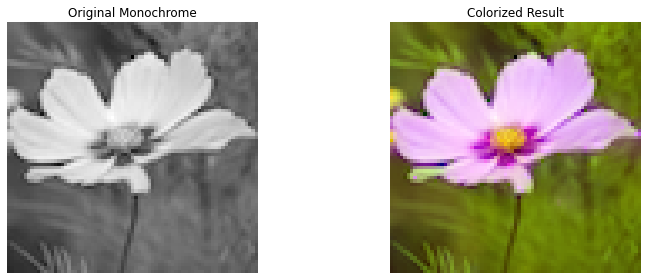

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


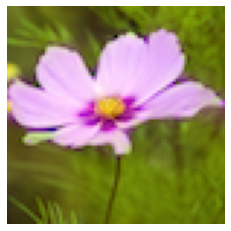

In [5]:
# Load and preprocess image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

# Read image and extract RGB channels
img = mpimg.imread("flower.png")
img = img[:,:,0:3]
m,n,_ = img.shape

# Generate random indices for known colors
np.random.seed(5)
random_numbers = np.random.rand(m,n) 
known_ind = np.where(random_numbers >= 0.90)

# Convert to float64 for numerical stability
img = img.astype('float64')

# Create grayscale image
M = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]

# Extract known color values
R_known = img[:,:,0][known_ind]
G_known = img[:,:,1][known_ind]
B_known = img[:,:,2][known_ind]

# Create variables for RGB channels
R = cp.Variable((m,n))
G = cp.Variable((m,n))
B = cp.Variable((m,n))

# Set up constraints
constraints = []

# Monochrome consistency
constraints.append(0.299*R + 0.587*G + 0.114*B == M)

# Known color values
constraints.append(R[known_ind] == R_known)
constraints.append(G[known_ind] == G_known)
constraints.append(B[known_ind] == B_known)

# Range constraints [0,1]
constraints.append(R >= 0)
constraints.append(R <= 1)
constraints.append(G >= 0)
constraints.append(G <= 1)
constraints.append(B >= 0)
constraints.append(B <= 1)

# Minimize total variation
objective = cp.tv(R, G, B)
prob = cp.Problem(cp.Minimize(objective), constraints)
result = prob.solve()

print(f"Optimal objective value: {prob.value}")

# Save and display results
def save_img(filename, R, G, B):
    img = np.stack((np.array(R), np.array(G), np.array(B)), axis=2)
    plt.imshow(img)
    plt.axis('off')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)

# Display original grayscale and colorized result
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(M, cmap='gray')
plt.title('Original Monochrome')
plt.axis('off')

plt.subplot(1, 2, 2)
colorized = np.stack([R.value, G.value, B.value], axis=2)
plt.imshow(colorized)
plt.title('Colorized Result')
plt.axis('off')

plt.tight_layout()
plt.show()

# Save the initial known colors image
R_given = np.copy(M)
R_given[known_ind] = R_known
G_given = np.copy(M)
G_given[known_ind] = G_known
B_given = np.copy(M)
B_given[known_ind] = B_known
save_img("flower_2025_given.png", R_given, G_given, B_given)

# Save the final colorized result
save_img("flower_colorized.png", R.value, G.value, B.value)


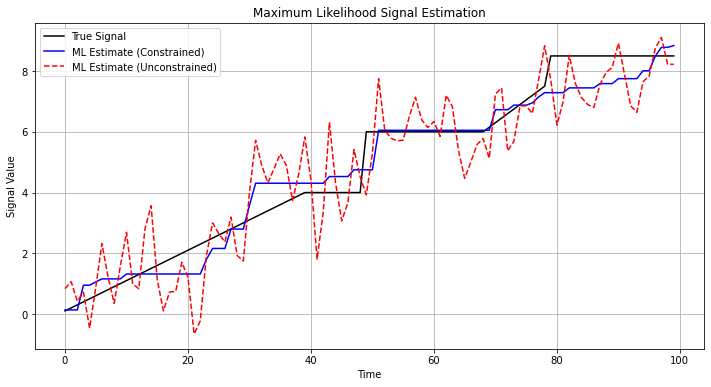

In [6]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Load data
N = 100
h = np.array([1, -0.85, 0.7, -0.3])
k = len(h)

# Create true signal for comparison
xtrue = np.zeros(N)
xtrue[0:40] = 0.1
xtrue[49] = 2
xtrue[69:80] = 0.15
xtrue[79] = 1
xtrue = np.cumsum(xtrue)

# Generate noisy measurements
yhat = np.convolve(h, xtrue)
y = yhat[0:-3] + np.random.randn(N)

# Maximum likelihood estimation with monotonicity constraints
x = cp.Variable(N)
constraints = [x >= 0]  # Nonnegativity constraint

# Add monotonicity constraints
for i in range(N-1):
    constraints.append(x[i+1] >= x[i])  # Monotonically increasing

# Objective: minimize squared error between convolution and measurements
conv = cp.conv(h, x)
obj = cp.sum_squares(conv[0:N] - y)

# Solve the constrained problem
prob = cp.Problem(cp.Minimize(obj), constraints)
prob.solve()

# Solve unconstrained problem for comparison
x_free = cp.Variable(N)
prob_free = cp.Problem(cp.Minimize(cp.sum_squares(cp.conv(h, x_free)[0:N] - y)))
prob_free.solve()

# Plot results
plt.figure(figsize=(12, 6))
t = np.arange(N)
plt.plot(t, xtrue, 'k-', label='True Signal')
plt.plot(t, x.value, 'b-', label='ML Estimate (Constrained)')
plt.plot(t, x_free.value, 'r--', label='ML Estimate (Unconstrained)')
plt.grid(True)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('Maximum Likelihood Signal Estimation')
plt.show()


In [10]:
import pandas as pd
import numpy as np
from datetime import datetime

# Read the data
df = pd.read_csv("AGI_Predictions_Table.csv")

# Function to convert prediction to year
def convert_to_year(prediction):
    current_year = datetime.now().year
    
    if isinstance(prediction, str):
        # Handle specific cases
        if prediction == "A few thousand days":
            return current_year + 8  # ~3000 days ≈ 8 years
        elif prediction == "Before advanced robotics":
            return current_year + 10  # Arbitrary assumption
        elif prediction == "Decades away":
            return current_year + 30  # Arbitrary assumption
        elif "years" in prediction:
            # Extract numbers from ranges like "5-20 years"
            nums = [int(x) for x in prediction.replace("years","").split("–")]
            return current_year + np.mean(nums)
        elif "–" in prediction:
            # Handle year ranges like "2025-2030"
            years = [int(x) for x in prediction.split("–")]
            return np.mean(years)
        try:
            # Try to convert direct year predictions
            return float(prediction)
        except:
            return None
    return prediction

# Filter out non-specific sources and process predictions
specific_sources = ~df['Figure/Source'].isin(['Compute/Energy', 'Alignment & Control', 
                                            'Job Displacement', 'Inequality Concerns',
                                            'Expert Surveys', 'AI Researcher Survey'])

df_clean = df[specific_sources].copy()
df_clean['Prediction_Year'] = df_clean['Prediction'].apply(convert_to_year)
df_clean = df_clean.dropna(subset=['Prediction_Year'])

# Remove duplicate predictions from same source by keeping most recent/specific one
df_clean = df_clean.sort_values('Prediction_Year').drop_duplicates(subset=['Figure/Source'], keep='first')

# Sort by prediction year
df_clean = df_clean.sort_values('Prediction_Year')
print("\nProcessed AGI Predictions:")
df_clean


Processed AGI Predictions:


,Figure/Source,Prediction,Notes,Prediction_Year
22,Elon Musk,2025–2026,Predicts AGI smarter than any human,2025.5
3,Dario Amodei,2026–2027,Predicts AI surpassing Nobel laureates; warns ...,2026.5
23,Sam Altman,2025–2030,Gradual takeoff expected rather than abrupt ex...,2027.5
17,Jensen Huang,2028,AGI defined as AI outperforming humans on broa...,2028.0
21,Ray Kurzweil,2029,Predicts AGI by then and superintelligence by ...,2029.0
16,Ben Goertzel,2029,Aligns with Kurzweil’s long-standing prediction,2029.0
10,Richard Socher,3–5 years,Defines AGI as when 80% of jobs are automated;...,2029.0
8,Metaculus Forecasts,2031,Median AGI prediction moved earlier due to GPT...,2031.0
4,Demis Hassabis,2030–2035,"Requires breakthroughs in reasoning, planning,...",2032.5
19,Paul Christiano,2033,30% probability of transformative AI by then,2033.0


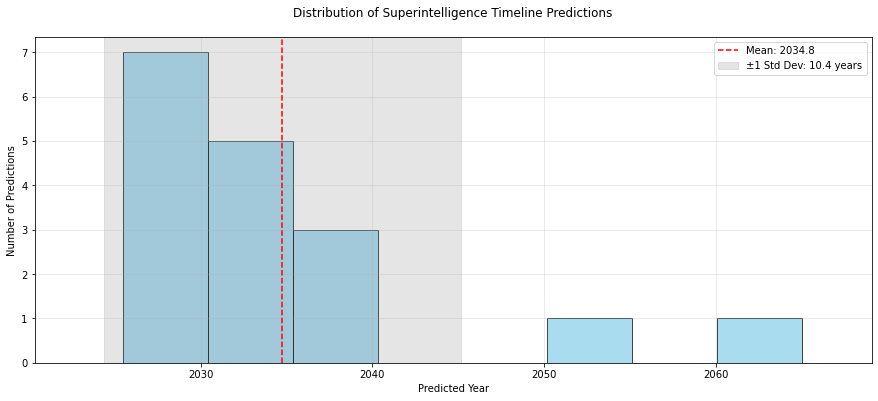

In [13]:
import matplotlib.pyplot as plt

# Calculate statistics
mean_year = df_clean['Prediction_Year'].mean()
std_year = df_clean['Prediction_Year'].std()

# Create histogram
plt.figure(figsize=(15, 6))
n, bins, patches = plt.hist(df_clean['Prediction_Year'], bins=8, color='skyblue', alpha=0.7, edgecolor='black')

# Add mean line
plt.axvline(mean_year, color='red', linestyle='--', label=f'Mean: {mean_year:.1f}')

# Add standard deviation range
plt.axvspan(mean_year - std_year, mean_year + std_year, color='gray', alpha=0.2, 
            label=f'±1 Std Dev: {std_year:.1f} years')

plt.title('Distribution of Superintelligence Timeline Predictions', pad=20)
plt.xlabel('Predicted Year')
plt.ylabel('Number of Predictions')
plt.grid(True, alpha=0.3)
plt.legend()

# Add some padding to x-axis
plt.margins(x=0.1)

plt.show()
